In [24]:
# Load packages:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
# Load the datasets:
# a) daily records:
df = pd.read_parquet('Final_dataset//TSR_040_daily_PDM.parquet', engine='fastparquet')
df.info()
print("\n")
print(df.head())

# b) cleaned dataset of all the corrective maintenances:
corr_maint = pd.read_parquet('Final_dataset//correct_maint_040_complete.parquet', engine='fastparquet')
print("\n")
print("correct maint dataset:")
print(corr_maint.info())

# c) cleaned dataset of all the scheduled maintenances:
sched_maint = pd.read_parquet('Final_dataset//sched_maint_040.parquet', engine='fastparquet')
print("\n")
print("sched maint dataset:")
print(sched_maint.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 64 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Time                   767 non-null    datetime64[ns]
 1   Source_mode            767 non-null    category      
 2   Source_711-083         767 non-null    int64         
 3   Source_711-084         767 non-null    int64         
 4   Name_mode              767 non-null    category      
 5   Name_710-131           767 non-null    int64         
 6   Name_710-132           767 non-null    int64         
 7   Name_710-135           767 non-null    int64         
 8   Name_710-170           767 non-null    int64         
 9   Name_711-083           767 non-null    int64         
 10  Name_711-084           767 non-null    int64         
 11  Type_mode              767 non-null    category      
 12  Type_PDM               767 non-null    int64         
 13  Type_

In [26]:
# Take the interval of time between the 2 bigger scheduled maintenances done (RP):
df = df[(df['Time'] > '2020-08-28') & (df['Time'] < '2023/01/25')]
df = df.reset_index(drop=True)
print(df.info())
print(df ['Time'].min())
print(df ['Time'].max())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 64 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Time                   580 non-null    datetime64[ns]
 1   Source_mode            580 non-null    category      
 2   Source_711-083         580 non-null    int64         
 3   Source_711-084         580 non-null    int64         
 4   Name_mode              580 non-null    category      
 5   Name_710-131           580 non-null    int64         
 6   Name_710-132           580 non-null    int64         
 7   Name_710-135           580 non-null    int64         
 8   Name_710-170           580 non-null    int64         
 9   Name_711-083           580 non-null    int64         
 10  Name_711-084           580 non-null    int64         
 11  Type_mode              580 non-null    category      
 12  Type_PDM               580 non-null    int64         
 13  Type_

In [27]:
# to simplify the typing procedure for plots:   
for col in df.columns:
    print(f"sns.displot(data=df, x='{col}', binwidth=1)")

sns.displot(data=df, x='Time', binwidth=1)
sns.displot(data=df, x='Source_mode', binwidth=1)
sns.displot(data=df, x='Source_711-083', binwidth=1)
sns.displot(data=df, x='Source_711-084', binwidth=1)
sns.displot(data=df, x='Name_mode', binwidth=1)
sns.displot(data=df, x='Name_710-131', binwidth=1)
sns.displot(data=df, x='Name_710-132', binwidth=1)
sns.displot(data=df, x='Name_710-135', binwidth=1)
sns.displot(data=df, x='Name_710-170', binwidth=1)
sns.displot(data=df, x='Name_711-083', binwidth=1)
sns.displot(data=df, x='Name_711-084', binwidth=1)
sns.displot(data=df, x='Type_mode', binwidth=1)
sns.displot(data=df, x='Type_PDM', binwidth=1)
sns.displot(data=df, x='Type_TRAIN_DRIVER', binwidth=1)
sns.displot(data=df, x='Type_WARNING', binwidth=1)
sns.displot(data=df, x='Complete_code_mode', binwidth=1)
sns.displot(data=df, x='Complete_code_2-19', binwidth=1)
sns.displot(data=df, x='Complete_code_5-1', binwidth=1)
sns.displot(data=df, x='Complete_code_5-10', binwidth=1)
sns.displot(data=d

count         580
unique          2
top       711-084
freq          525
Name: Source_mode, dtype: object
Source_mode
711-084    525
711-083     55
Name: count, dtype: int64


count    580.000000
mean      36.753448
std       36.871802
min        0.000000
25%       13.000000
50%       27.000000
75%       51.000000
max      464.000000
Name: Source_711-083, dtype: float64
count    580.000000
mean     102.256897
std       65.874072
min        0.000000
25%       59.750000
50%       95.000000
75%      131.250000
max      513.000000
Name: Source_711-084, dtype: float64




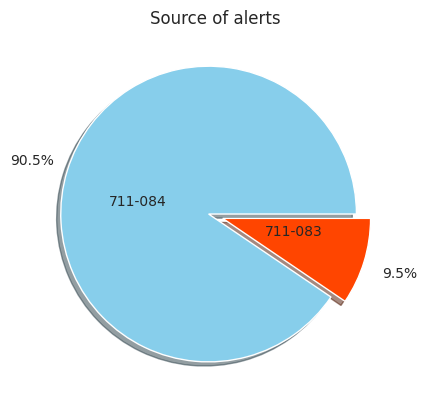

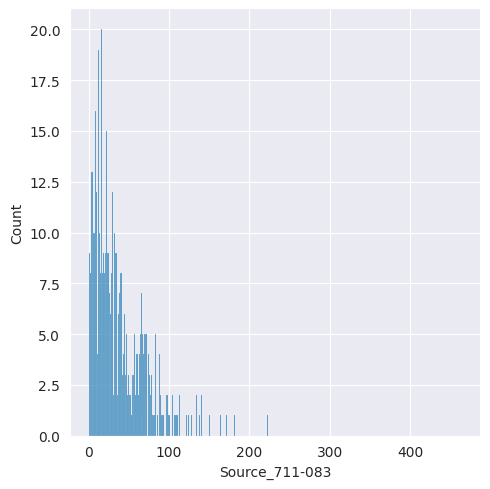

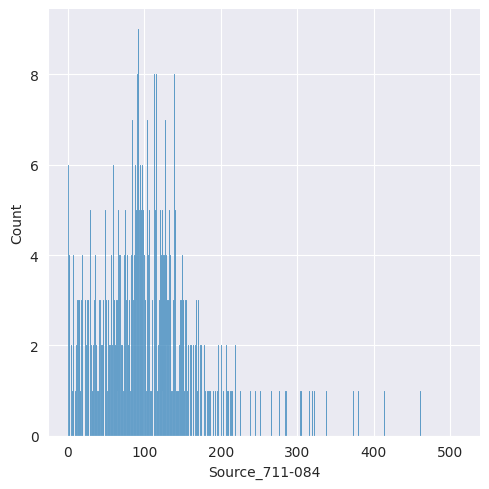

In [28]:
# Source variable:
print(df['Source_mode'].describe())
print(df['Source_mode'].value_counts())
print("\n")

print(df['Source_711-083'].describe())
print(df['Source_711-084'].describe())
print("\n")

sizes_source = df['Source_mode'].value_counts().tolist()
labels_source = df['Source_mode'].value_counts().index
fig, ax = plt.subplots()
ax.pie(sizes_source, labels=labels_source, explode=[0.05]*len(labels_source == "711-084"), autopct='%1.1f%%', pctdistance=1.25, labeldistance=.3, shadow=True, colors=['skyblue', 'orangered'])
plt.title('Source of alerts')
plt.show()

sns.displot(data=df, x="Source_711-083", binwidth=1)
sns.displot(data=df, x="Source_711-084", binwidth=1)

count         580
unique          6
top       710-170
freq          211
Name: Name_mode, dtype: object
Name_mode
710-170    211
711-084    158
710-132     95
711-083     75
710-131     30
710-135     11
710-000      0
Name: count, dtype: int64


count    580.000000
mean      10.503448
std       23.120881
min        0.000000
25%        0.750000
50%        5.000000
75%       13.000000
max      455.000000
Name: Name_710-131, dtype: float64
count    580.000000
mean      31.481034
std       27.885492
min        0.000000
25%       14.000000
50%       27.000000
75%       41.000000
max      249.000000
Name: Name_710-132, dtype: float64
count    580.000000
mean       8.491379
std        9.194216
min        0.000000
25%        2.000000
50%        6.000000
75%       12.000000
max       59.000000
Name: Name_710-135, dtype: float64
count    580.000000
mean      36.298276
std       29.871093
min        0.000000
25%       15.000000
50%       32.000000
75%       51.000000
max      380.000000
Name: Nam

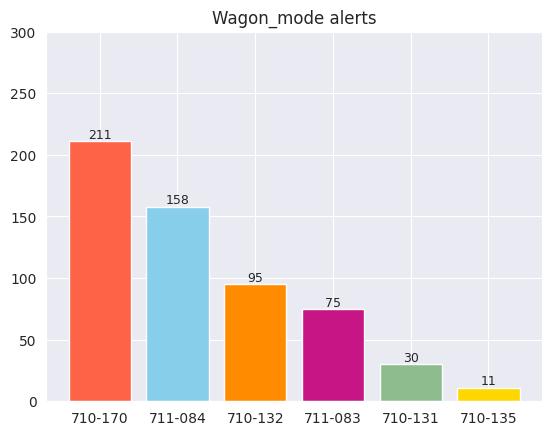

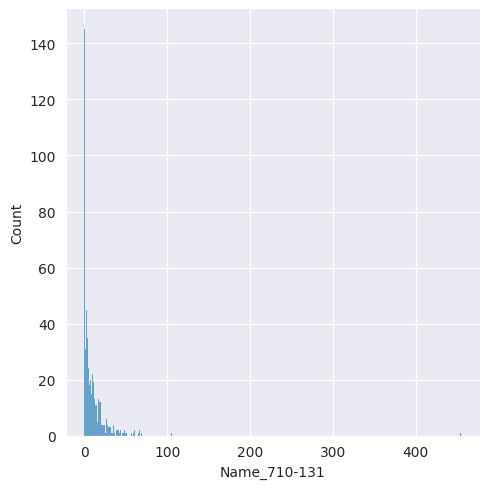

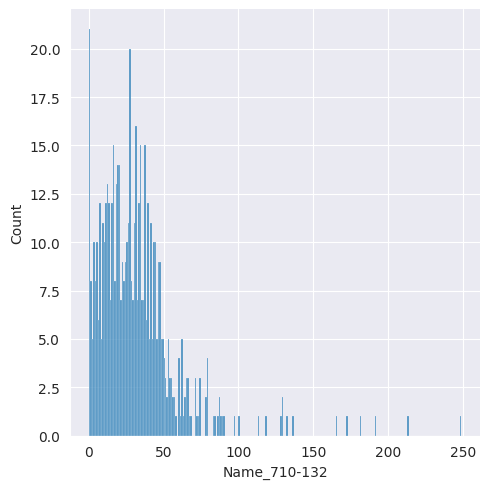

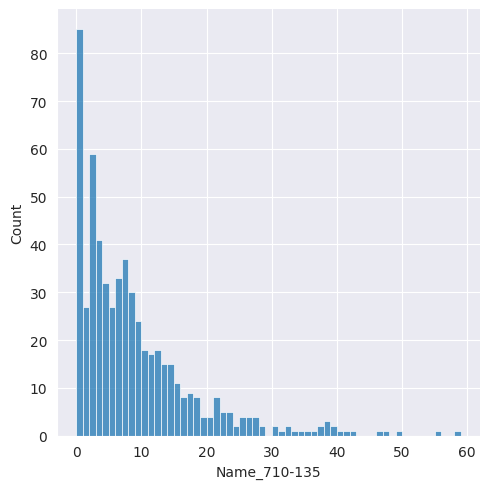

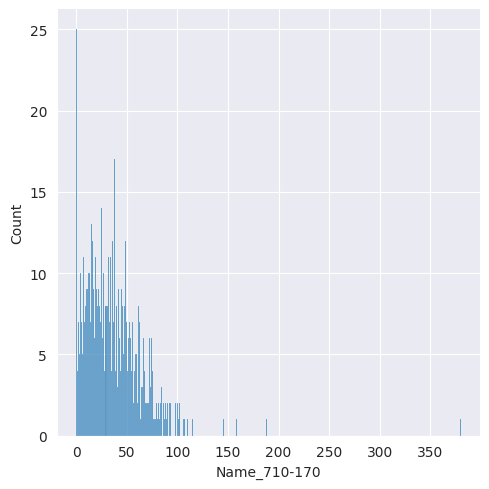

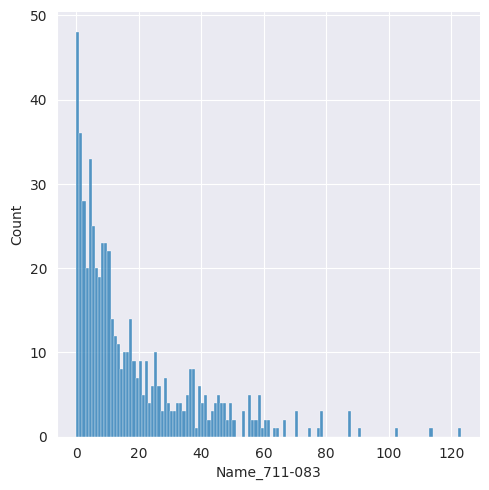

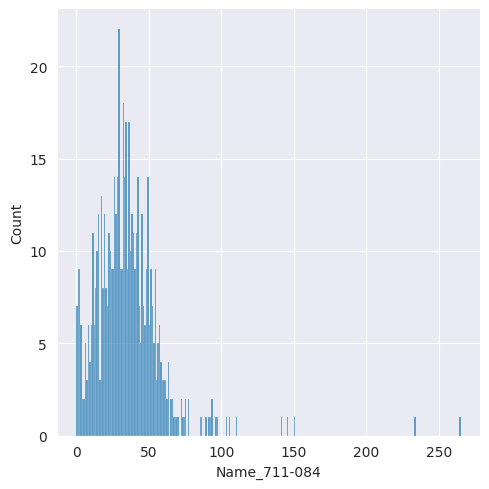

In [29]:
# Name variable:
print(df['Name_mode'].describe())
print(df['Name_mode'].value_counts())
print("\n")

print(df['Name_710-131'].describe())
print(df['Name_710-132'].describe())
print(df['Name_710-135'].describe())
print(df['Name_710-170'].describe())
print(df['Name_711-083'].describe())
print(df['Name_711-084'].describe())
print("\n")

sizes_name = df['Name_mode'].value_counts().tolist()
sizes_name = sizes_name[:-1]
labels_name = df['Name_mode'].value_counts().index
labels_name = labels_name[:-1]
fig, ax = plt.subplots()
bar_container = ax.bar(labels_name, sizes_name, color=['tomato', 'skyblue', 'darkorange', 'mediumvioletred', 'darkseagreen', 'gold'])
ax.bar_label(bar_container, fmt='{:,.0f}', fontsize=9)
ax.set(title='Wagon_mode alerts', ylim=(0, 300))
plt.show()

sns.displot(data=df, x='Name_710-131', binwidth=1)
sns.displot(data=df, x='Name_710-132', binwidth=1)
sns.displot(data=df, x='Name_710-135', binwidth=1)
sns.displot(data=df, x='Name_710-170', binwidth=1)
sns.displot(data=df, x='Name_711-083', binwidth=1)
sns.displot(data=df, x='Name_711-084', binwidth=1)

In [30]:
# extra check)
print(df['Name_710-131'].sum())
print(df['Name_710-131'].sum() / len(df))
where_name_high = df[df['Name_710-131'] > 50].index
print(where_name_high)
df.loc[where_name_high, ('Time','Name_710-131','Complete_code_mode','Services')]

6092
10.50344827586207
Index([76, 162, 163, 175, 176, 184, 189, 194, 196, 337, 338, 343, 345, 351], dtype='int64')


,Time,Name_710-131,Complete_code_mode,Services
76,2021-02-26,105,5-98,13
162,2021-06-17,66,5-98,17
163,2021-06-18,66,5-98,13
175,2021-06-30,63,5-98,16
176,2021-07-01,65,5-98,18
184,2021-07-09,60,5-98,15
189,2021-07-15,52,5-98,16
194,2021-07-20,87,5-98,13
196,2021-07-22,455,5-98,16
337,2022-02-07,56,5-9,13


count     580
unique      1
top       PDM
freq      580
Name: Type_mode, dtype: object
Type_mode
PDM             580
TRAIN_DRIVER      0
WARNING           0
Name: count, dtype: int64


count    580.000000
mean     136.143103
std       82.763257
min        2.000000
25%       84.000000
50%      129.000000
75%      177.000000
max      619.000000
Name: Type_PDM, dtype: float64
count    580.000000
mean       0.634483
std        1.273152
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       15.000000
Name: Type_TRAIN_DRIVER, dtype: float64
count    580.000000
mean       2.232759
std        3.001317
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max       26.000000
Name: Type_WARNING, dtype: float64




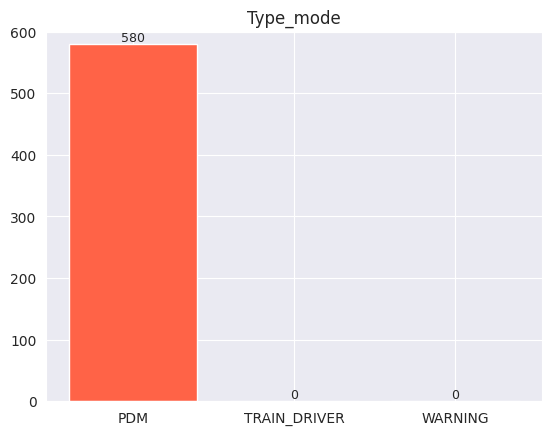

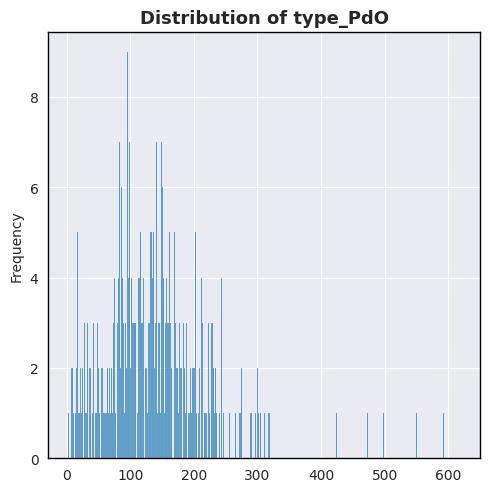

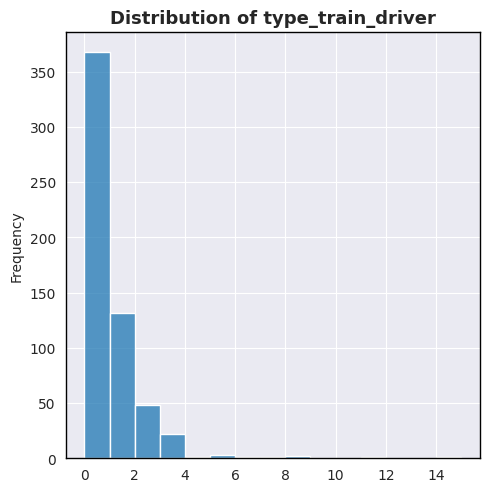

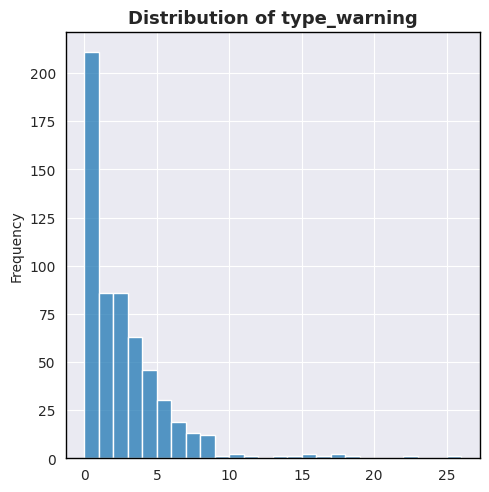

In [31]:
# Type variable:
print(df['Type_mode'].describe())
print(df['Type_mode'].value_counts())
print("\n")

print(df['Type_PDM'].describe())
print(df['Type_TRAIN_DRIVER'].describe())
print(df['Type_WARNING'].describe())
print("\n")

sizes_type = df['Type_mode'].value_counts().tolist()
labels_type = df['Type_mode'].value_counts().index
fig, ax = plt.subplots()
bar_container = ax.bar(labels_type, sizes_type, color=['tomato', 'skyblue', 'darkorange', 'mediumvioletred', 'darkseagreen', 'gold'])
ax.bar_label(bar_container, fmt='{:,.0f}', fontsize=9)
ax.set(title='Type_mode', ylim=(0, 600))
plt.show()

sns.displot(data=df, x='Type_PDM', binwidth=1)
plt.ylabel('Frequency', fontsize=10)
plt.xlabel('')
plt.title('Distribution of type_PdO', fontsize=13, fontweight='bold')
ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(True)
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1)
plt.savefig('type_pdo.png', transparent=True, bbox_inches='tight')

sns.displot(data=df, x='Type_TRAIN_DRIVER', binwidth=1)
plt.ylabel('Frequency', fontsize=10)
plt.xlabel('')
plt.title('Distribution of type_train_driver', fontsize=13, fontweight='bold')
ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(True)
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1)
plt.savefig('type_train_driver.png', transparent=True, bbox_inches='tight')

sns.displot(data=df, x='Type_WARNING', binwidth=1)
plt.ylabel('Frequency', fontsize=10)
plt.xlabel('')
plt.title('Distribution of type_warning', fontsize=13, fontweight='bold')
ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(True)
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1)
plt.savefig('type_warning.png', transparent=True, bbox_inches='tight')

In [32]:
# extra check)
print(df['Type_PDM'].sum())
print(df['Type_PDM'].sum() / len(df))
print("\n")
print(df['Type_WARNING'].sum())
print(df['Type_WARNING'].sum() / len(df))
print("\n")
print(df['Type_TRAIN_DRIVER'].sum())
print(df['Type_TRAIN_DRIVER'].sum() / len(df))

where_pdm_low = df[df['Type_PDM'] < 10].index
print(where_pdm_low)
df.loc[where_pdm_low, ('Time','Type_PDM','Type_TRAIN_DRIVER','Type_WARNING','Complete_code_mode','Services')]

78963
136.14310344827587


1295
2.2327586206896552


368
0.6344827586206897
Index([43, 50, 59, 92, 124, 185, 236, 301, 395, 477], dtype='int64')


,Time,Type_PDM,Type_TRAIN_DRIVER,Type_WARNING,Complete_code_mode,Services
43,2021-01-19,5,0,0,5-5,4
50,2021-01-27,7,0,0,5-5,16
59,2021-02-06,9,0,0,5-98,15
92,2021-03-18,9,0,0,5-98,1
124,2021-04-23,5,0,0,5-98,4
185,2021-07-10,3,0,0,5-98,1
236,2021-09-12,8,0,0,5-98,4
301,2022-01-01,2,0,0,5-98,1
395,2022-04-23,5,0,0,5-1,2
477,2022-08-21,7,0,0,5-98,2


count      580
unique      11
top       5-98
freq       349
Name: Complete_code_mode, dtype: object
Complete_code_mode
5-98    349
5-9      79
5-5      43
5-35     29
5-33     26
5-3      22
5-7      12
5-1      11
5-31      4
5-99      4
5-13      1
5-20      0
5-21      0
5-17      0
5-16      0
5-32      0
5-15      0
5-34      0
5-14      0
5-36      0
5-12      0
5-11      0
5-90      0
5-10      0
2-19      0
Name: count, dtype: int64


0
35
0
40
0
6
0
55
0
24
0
34
0
26
0
12
0
5
0
15
0
13
0
7
0
125
0
42
0
23
0
61
0
24
0
67
0
19
0
192
0
60
0
108
0
9
0
459
0
51


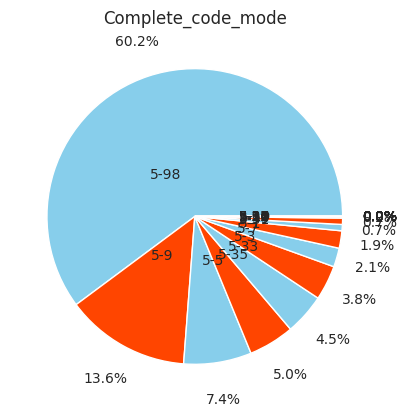

/home/jupyter-giulia/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


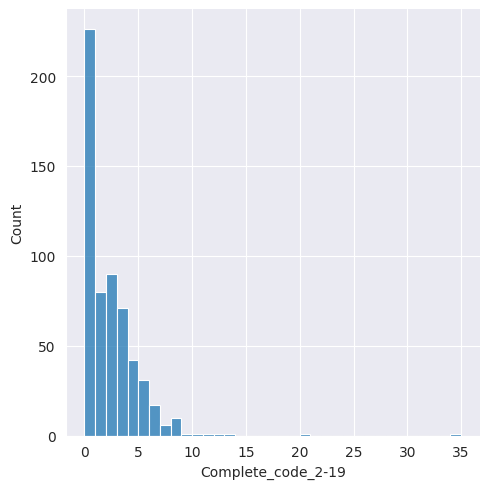

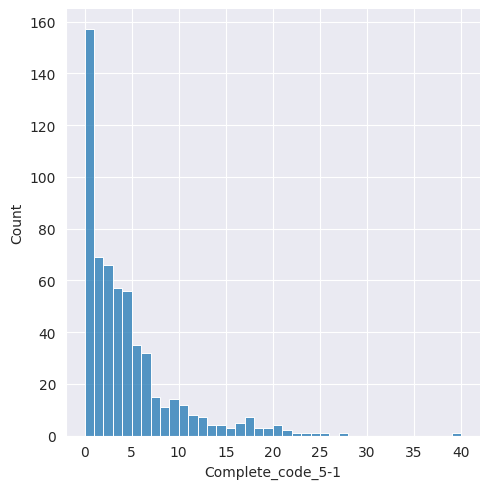

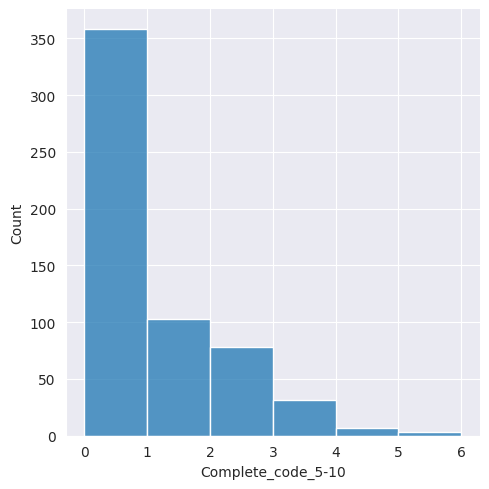

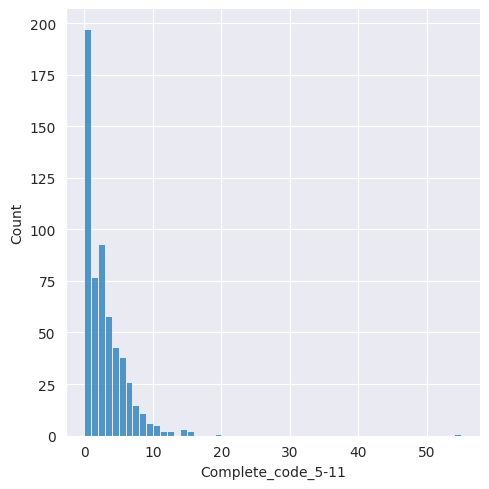

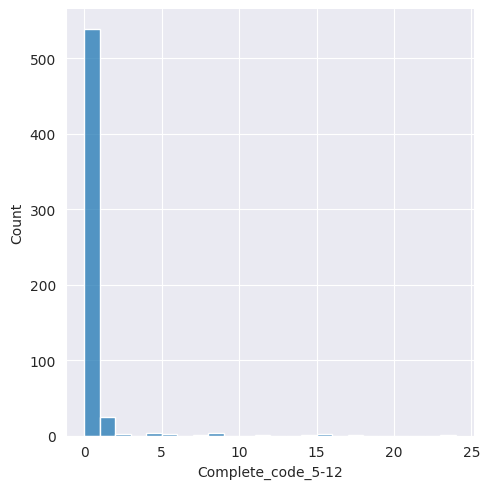

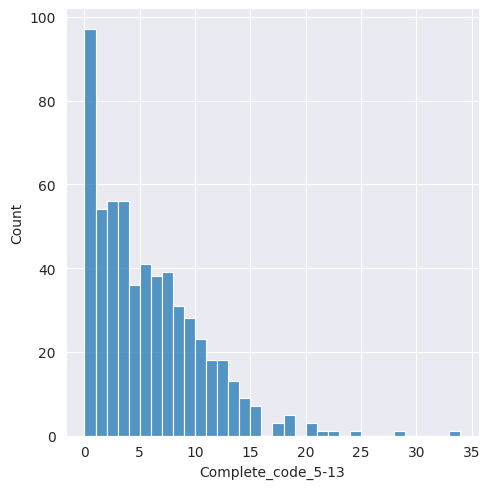

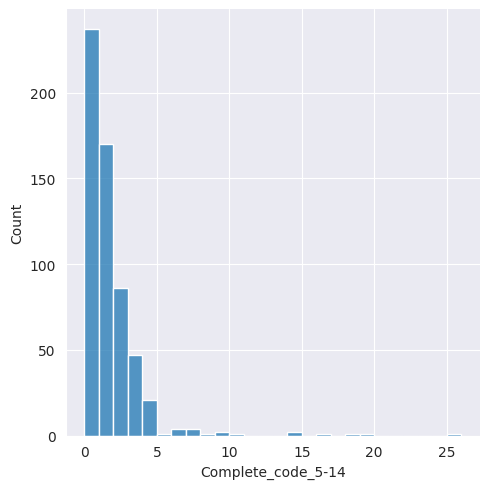

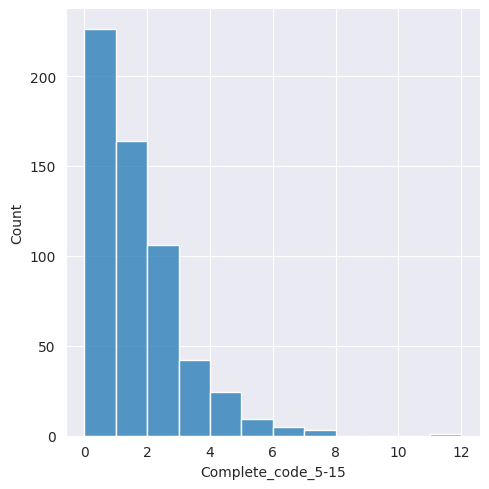

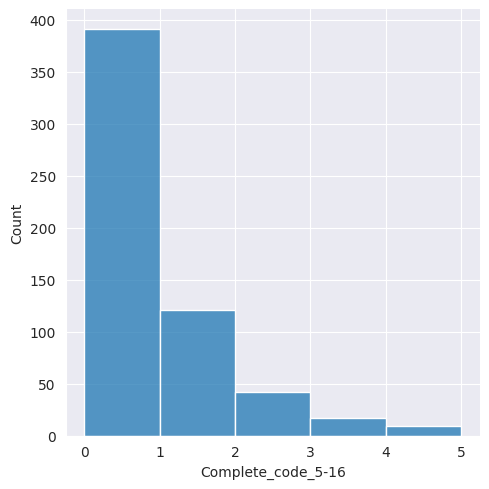

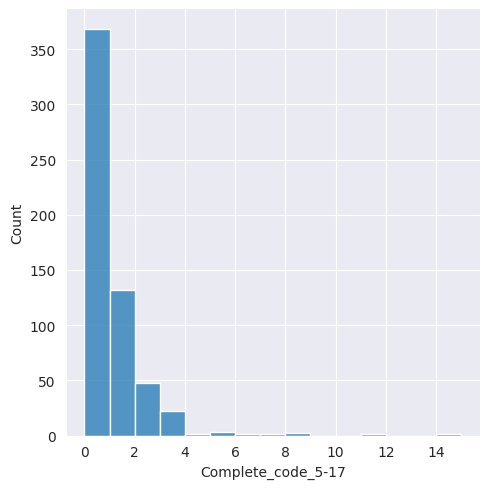

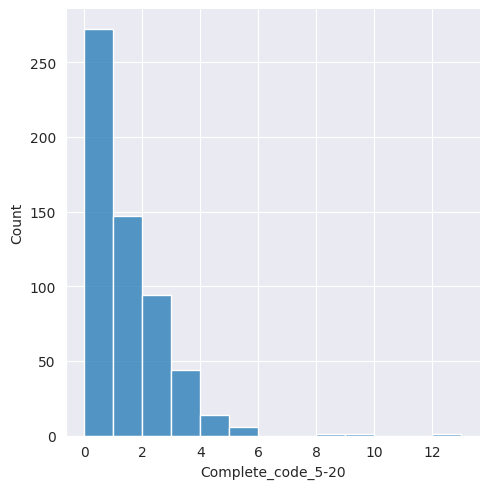

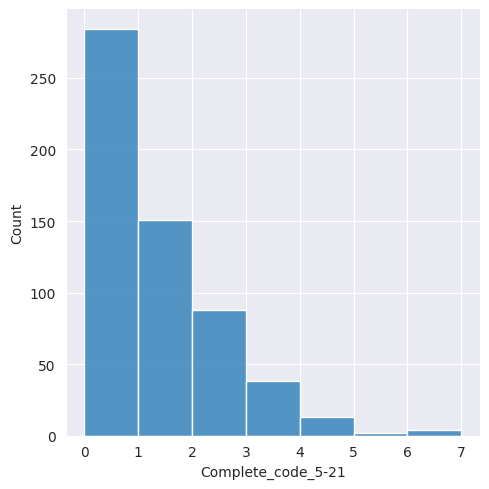

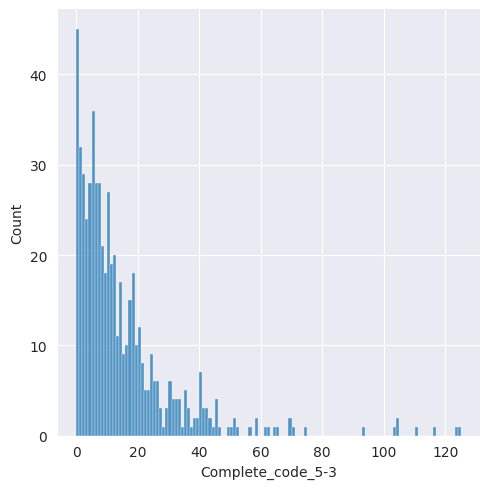

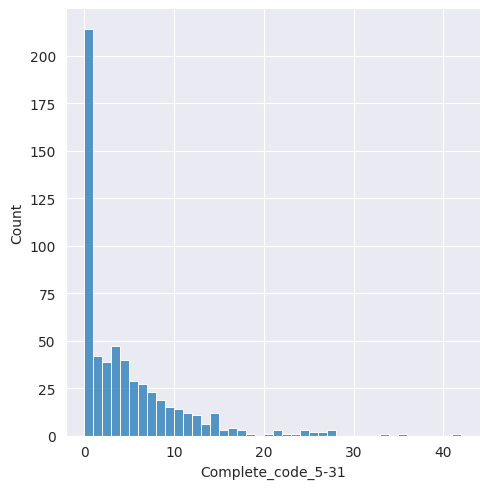

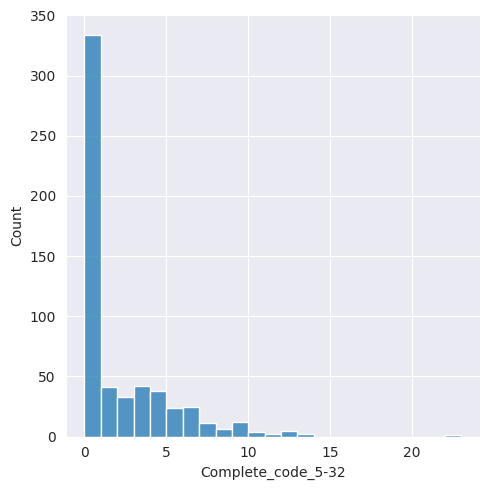

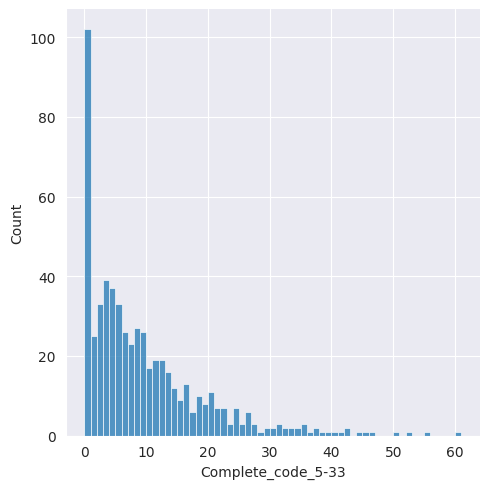

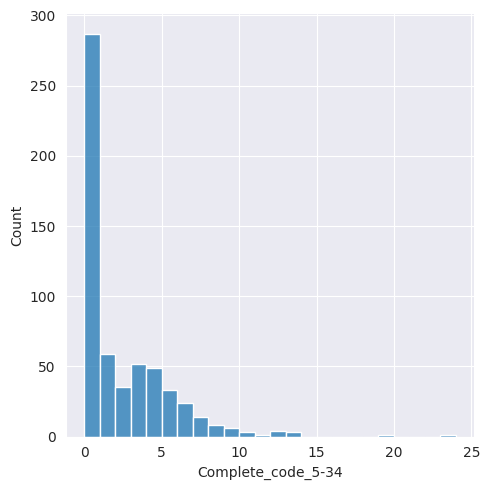

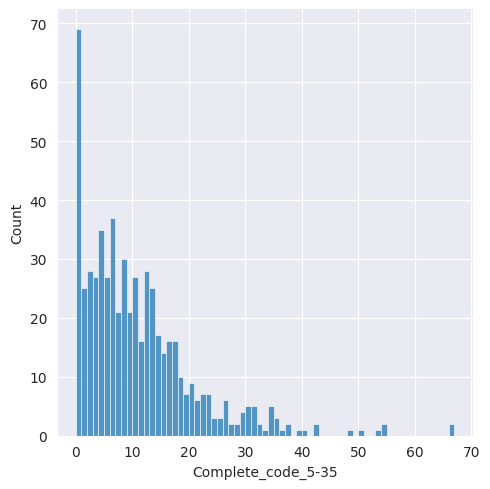

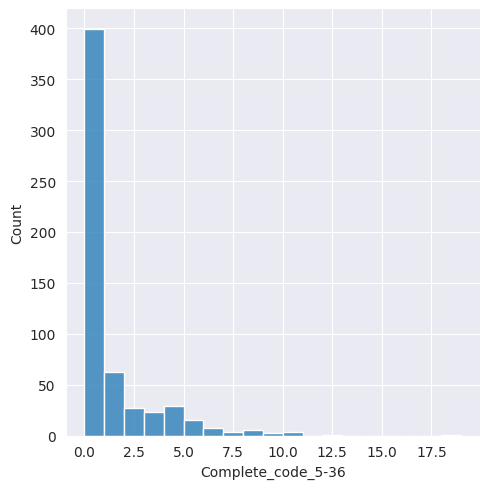

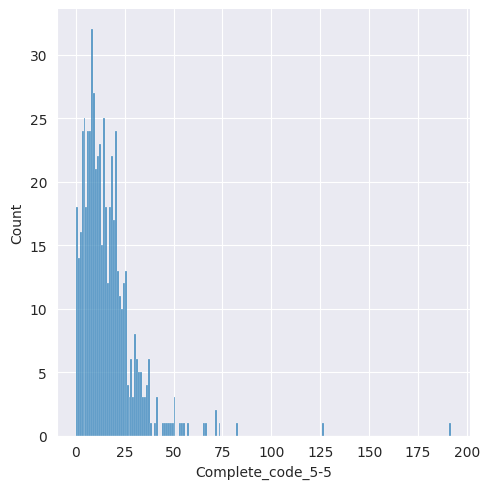

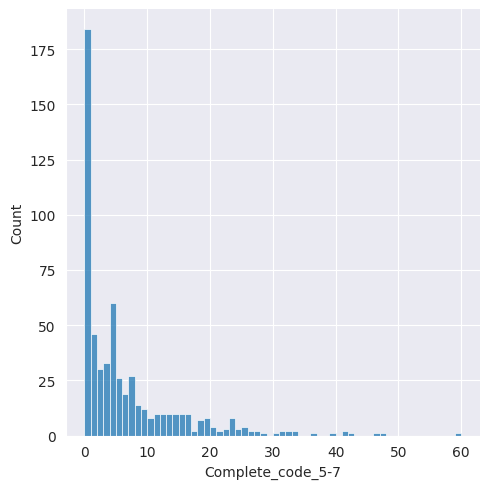

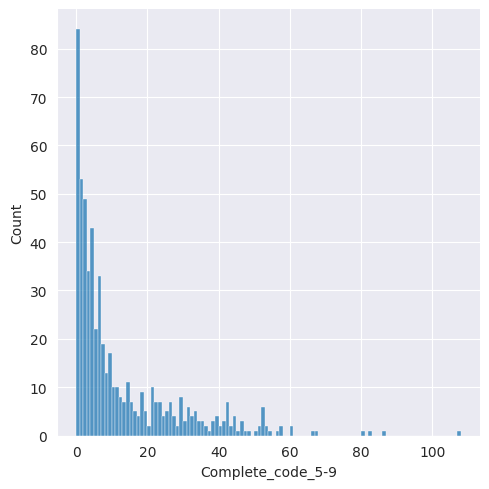

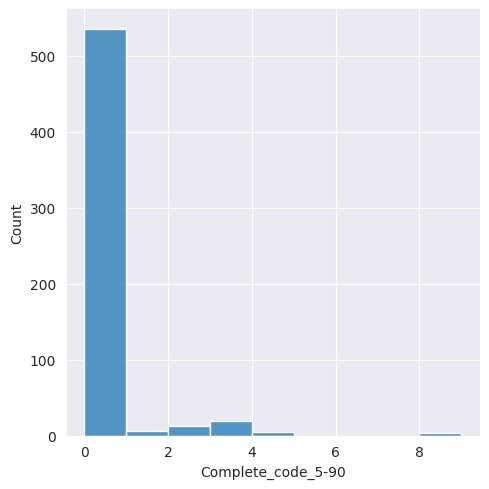

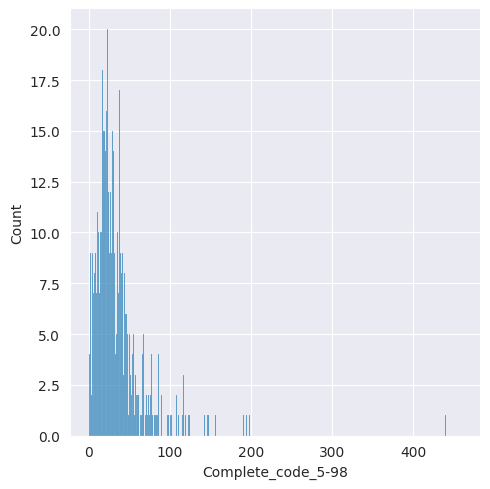

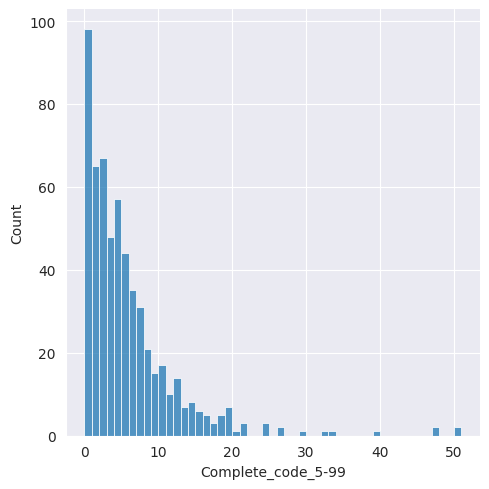

In [33]:
# Complete_code variable:
print(df['Complete_code_mode'].describe())
print(df['Complete_code_mode'].value_counts())
print("\n")

#for i, cat in enumerate(df['Complete_code_mode'].cat.categories):
    #print(f"print(df['Complete_code_{cat}'].min())")
    #print(f"print(df['Complete_code_{cat}'].max())")

print(df['Complete_code_2-19'].min())
print(df['Complete_code_2-19'].max())
print(df['Complete_code_5-1'].min())
print(df['Complete_code_5-1'].max())
print(df['Complete_code_5-10'].min())
print(df['Complete_code_5-10'].max())
print(df['Complete_code_5-11'].min())
print(df['Complete_code_5-11'].max())
print(df['Complete_code_5-12'].min())
print(df['Complete_code_5-12'].max())
print(df['Complete_code_5-13'].min())
print(df['Complete_code_5-13'].max())
print(df['Complete_code_5-14'].min())
print(df['Complete_code_5-14'].max())
print(df['Complete_code_5-15'].min())
print(df['Complete_code_5-15'].max())
print(df['Complete_code_5-16'].min())
print(df['Complete_code_5-16'].max())
print(df['Complete_code_5-17'].min())
print(df['Complete_code_5-17'].max())
print(df['Complete_code_5-20'].min())
print(df['Complete_code_5-20'].max())
print(df['Complete_code_5-21'].min())
print(df['Complete_code_5-21'].max())
print(df['Complete_code_5-3'].min())
print(df['Complete_code_5-3'].max())
print(df['Complete_code_5-31'].min())
print(df['Complete_code_5-31'].max())
print(df['Complete_code_5-32'].min())
print(df['Complete_code_5-32'].max())
print(df['Complete_code_5-33'].min())
print(df['Complete_code_5-33'].max())
print(df['Complete_code_5-34'].min())
print(df['Complete_code_5-34'].max())
print(df['Complete_code_5-35'].min())
print(df['Complete_code_5-35'].max())
print(df['Complete_code_5-36'].min())
print(df['Complete_code_5-36'].max())
print(df['Complete_code_5-5'].min())
print(df['Complete_code_5-5'].max())
print(df['Complete_code_5-7'].min())
print(df['Complete_code_5-7'].max())
print(df['Complete_code_5-9'].min())
print(df['Complete_code_5-9'].max())
print(df['Complete_code_5-90'].min())
print(df['Complete_code_5-90'].max())
print(df['Complete_code_5-98'].min())
print(df['Complete_code_5-98'].max())
print(df['Complete_code_5-99'].min())
print(df['Complete_code_5-99'].max())

sizes_code = df['Complete_code_mode'].value_counts().tolist()
labels_code = df['Complete_code_mode'].value_counts().index
fig, ax = plt.subplots()
ax.pie(sizes_code, labels=labels_code, autopct='%1.1f%%', pctdistance=1.25, labeldistance=.3, shadow=False, colors=['skyblue', 'orangered'])
plt.title('Complete_code_mode')
plt.show()

sns.displot(data=df, x='Complete_code_2-19', binwidth=1)
sns.displot(data=df, x='Complete_code_5-1', binwidth=1)
sns.displot(data=df, x='Complete_code_5-10', binwidth=1)
sns.displot(data=df, x='Complete_code_5-11', binwidth=1)
sns.displot(data=df, x='Complete_code_5-12', binwidth=1)
sns.displot(data=df, x='Complete_code_5-13', binwidth=1)
sns.displot(data=df, x='Complete_code_5-14', binwidth=1)
sns.displot(data=df, x='Complete_code_5-15', binwidth=1)
sns.displot(data=df, x='Complete_code_5-16', binwidth=1)
sns.displot(data=df, x='Complete_code_5-17', binwidth=1)
sns.displot(data=df, x='Complete_code_5-20', binwidth=1)
sns.displot(data=df, x='Complete_code_5-21', binwidth=1)
sns.displot(data=df, x='Complete_code_5-3', binwidth=1)
sns.displot(data=df, x='Complete_code_5-31', binwidth=1)
sns.displot(data=df, x='Complete_code_5-32', binwidth=1)
sns.displot(data=df, x='Complete_code_5-33', binwidth=1)
sns.displot(data=df, x='Complete_code_5-34', binwidth=1)
sns.displot(data=df, x='Complete_code_5-35', binwidth=1)
sns.displot(data=df, x='Complete_code_5-36', binwidth=1)
sns.displot(data=df, x='Complete_code_5-5', binwidth=1)
sns.displot(data=df, x='Complete_code_5-7', binwidth=1)
sns.displot(data=df, x='Complete_code_5-9', binwidth=1)
sns.displot(data=df, x='Complete_code_5-90', binwidth=1)
sns.displot(data=df, x='Complete_code_5-98', binwidth=1)
sns.displot(data=df, x='Complete_code_5-99', binwidth=1)

In [34]:
# extra check)
print(df['Complete_code_5-98'].sum())
print(df['Complete_code_5-98'].sum() / len(df))
print("\n")
where_code_high = df[df['Complete_code_5-98'] > 100].index
print(where_code_high)
df.loc[where_code_high, ('Time','Type_PDM','Type_TRAIN_DRIVER','Type_WARNING','Complete_code_5-98','Complete_code_mode','Services')]

20528
35.39310344827586


Index([ 37,  66,  72,  73,  74,  76, 142, 161, 162, 163, 165, 167, 168, 175,
       176, 178, 184, 186, 189, 190, 193, 194, 196, 197, 198, 231, 567],
      dtype='int64')


,Time,Type_PDM,Type_TRAIN_DRIVER,Type_WARNING,Complete_code_5-98,Complete_code_mode,Services
37,2021-01-10,311,5,2,116,5-98,15
66,2021-02-13,550,0,0,198,5-98,11
72,2021-02-22,475,2,8,128,5-98,17
73,2021-02-23,365,0,16,124,5-98,15
74,2021-02-24,439,3,17,116,5-98,19
76,2021-02-26,498,0,0,190,5-98,13
142,2021-05-14,234,3,2,108,5-98,15
161,2021-06-15,252,1,3,123,5-98,16
162,2021-06-17,243,2,3,122,5-98,17
163,2021-06-18,316,1,3,142,5-98,13


count    580.000000
mean      26.884409
std       11.014920
min        0.000000
25%       19.951872
50%       26.074306
75%       34.020863
max       71.890244
Name: Speed_mean, dtype: float64


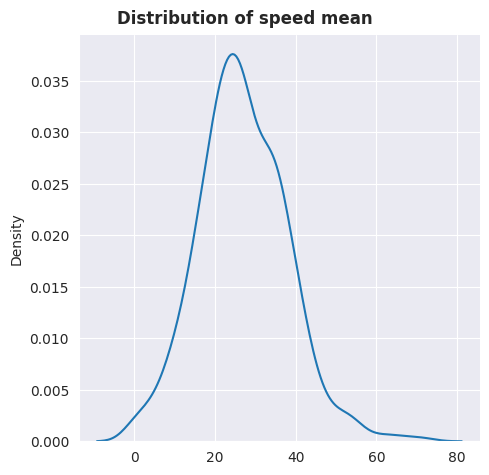

In [35]:
# Speed variable:
print(df['Speed_mean'].describe())
sns.displot(data=df, x="Speed_mean", kind="kde")
plt.xlabel('')
plt.subplots_adjust(top=0.93)
plt.suptitle('Distribution of speed mean', fontweight='bold', y=0.98, ha='center')
plt.savefig('speed_mean.png', transparent=True)

count     580
unique      2
top         0
freq      568
Name: Criticality_mode, dtype: int64
Criticality_mode
0    568
1     12
Name: count, dtype: int64


count    580.000000
mean       0.283325
std        0.105861
min        0.000000
25%        0.222222
50%        0.281965
75%        0.339668
max        1.000000
Name: Criticality_ratio, dtype: float64


count    580.000000
mean      99.610345
std       62.363190
min        0.000000
25%       59.750000
50%       93.000000
75%      130.000000
max      549.000000
Name: Criticality_0, dtype: float64
count    580.000000
mean      39.400000
std       27.680112
min        0.000000
25%       21.000000
50%       35.500000
75%       51.000000
max      216.000000
Name: Criticality_1, dtype: float64


How many not critic?: 57774 --> 0.7165678565227098
How many critic?: 22852 --> 0.2834321434772902


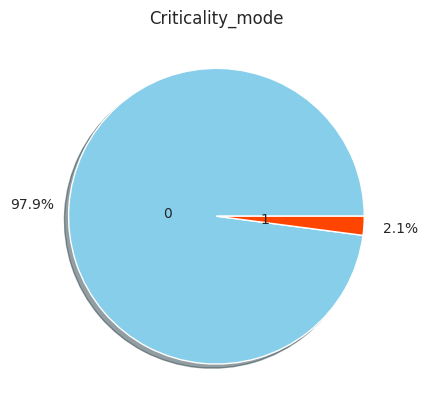

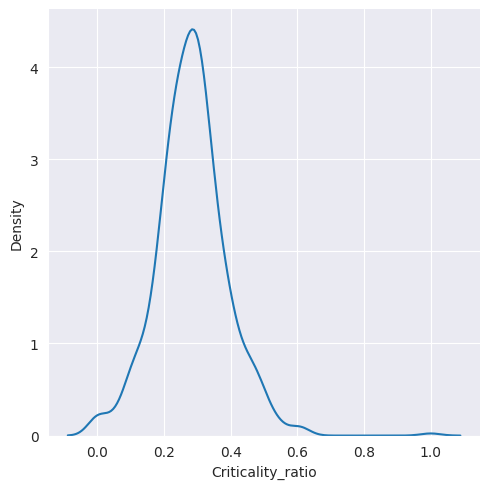

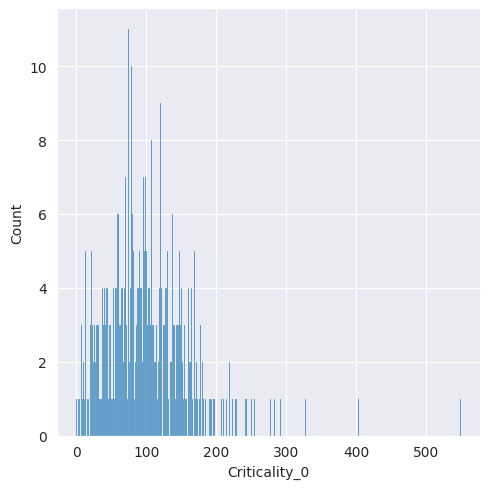

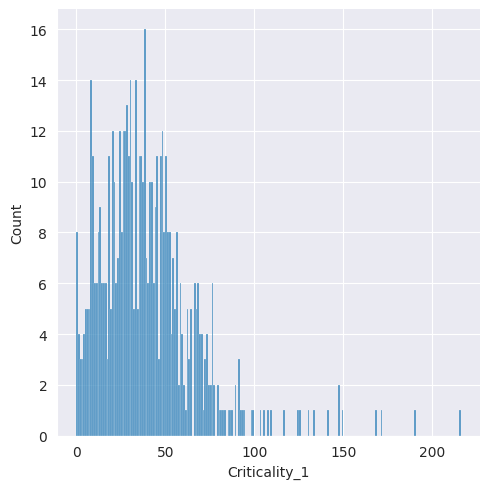

In [36]:
# Criticality variable:
print(df['Criticality_mode'].describe())
print(df['Criticality_mode'].value_counts())
print("\n")
print(df['Criticality_ratio'].describe())
print("\n")
print(df['Criticality_0'].describe())
print(df['Criticality_1'].describe())
print("\n")
print(f"How many not critic?: {df['Criticality_0'].sum()} --> {df['Criticality_0'].sum()/(df['Criticality_0'].sum()+df['Criticality_1'].sum())}")
print(f"How many critic?: {df['Criticality_1'].sum()} --> {df['Criticality_1'].sum()/(df['Criticality_0'].sum()+df['Criticality_1'].sum())}")


sizes_crit = df['Criticality_mode'].value_counts().tolist()
labels_crit = df['Criticality_mode'].value_counts().index
fig, ax = plt.subplots()
ax.pie(sizes_crit, labels=labels_crit, autopct='%1.1f%%', pctdistance=1.25, labeldistance=.3, shadow=True, colors=['skyblue', 'orangered'])
plt.title('Criticality_mode')
plt.show()

sns.displot(data=df, x="Criticality_ratio", kind="kde")

sns.displot(data=df, x='Criticality_0', binwidth=1)
sns.displot(data=df, x='Criticality_1', binwidth=1)

In [37]:
# extra check)
print(df['Criticality_0'].sum())
print(df['Criticality_0'].sum() / len(df))
print("\n")
print(df['Criticality_1'].sum())
print(df['Criticality_1'].sum() / len(df))
print("\n")
where_notcrit_high = df[df['Criticality_0'] > 300].index
print(where_notcrit_high)
df.loc[where_notcrit_high]

57774
99.6103448275862


22852
39.4


Index([66, 72, 76, 194, 196], dtype='int64')


,Time,Source_mode,Source_711-083,Source_711-084,Name_mode,Name_710-131,Name_710-132,Name_710-135,Name_710-170,Name_711-083,...,Services,Total_KM,R4_progr_count,RD_progr_count,RP_progr_count,RT_progr_count,VI_progr_count,VIS_progr_count,Sched_maint_progr,Corr_maint_progr
66,2021-02-13,711-084,171,379,710-170,46,128,38,158,87,...,11,442.2,1,0,1,1,2,1,6,9
72,2021-02-22,711-084,72,413,710-132,18,165,37,107,17,...,17,324.3,1,0,1,1,3,1,7,9
76,2021-02-26,711-084,222,276,710-131,105,79,59,100,58,...,13,522.6,1,0,1,1,3,1,7,9
194,2021-07-20,711-084,106,513,710-170,87,74,9,380,10,...,13,591.2,1,0,1,2,4,1,9,13
196,2021-07-22,711-083,464,132,710-131,455,33,1,51,8,...,16,387.5,1,0,1,2,4,1,9,13


count         580
unique          2
top       azzurro
freq          561
Name: Colour_mode, dtype: object
Colour_mode
azzurro    561
giallo      19
Name: count, dtype: int64


count    580.000000
mean      96.613793
std       61.378740
min        0.000000
25%       57.000000
50%       90.000000
75%      127.250000
max      546.000000
Name: Colour_azzurro, dtype: float64
count    580.000000
mean      42.396552
std       29.108361
min        0.000000
25%       24.000000
50%       38.000000
75%       55.000000
max      221.000000
Name: Colour_giallo, dtype: float64


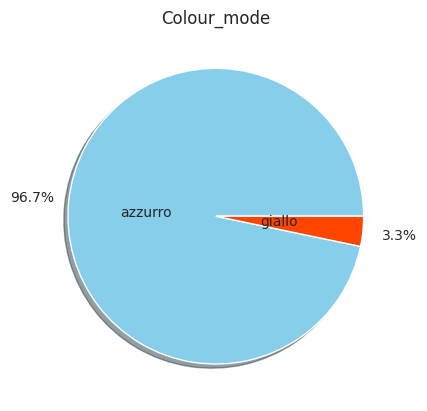

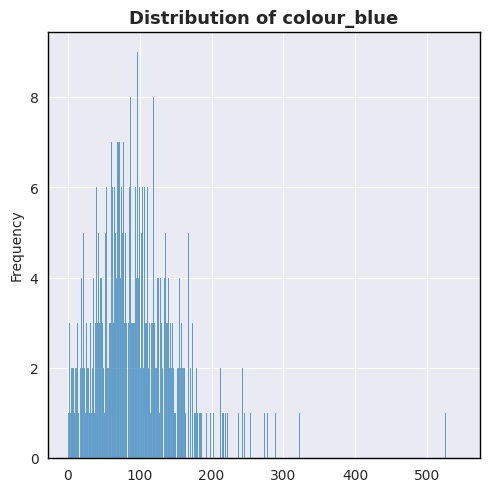

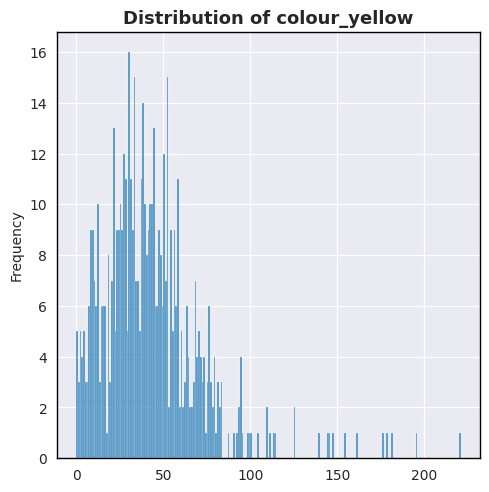

In [38]:
# Colour variable:
print(df['Colour_mode'].describe())
print(df['Colour_mode'].value_counts())
print("\n")
print(df['Colour_azzurro'].describe())
print(df['Colour_giallo'].describe())

sizes_colour = df['Colour_mode'].value_counts().tolist()
labels_colour = df['Colour_mode'].value_counts().index
fig, ax = plt.subplots()
ax.pie(sizes_colour, labels=labels_colour, autopct='%1.1f%%', pctdistance=1.25, labeldistance=.3, shadow=True, colors=['skyblue', 'orangered'])
plt.title('Colour_mode')
plt.show()

sns.displot(data=df, x='Colour_azzurro', binwidth=1)
plt.ylabel('Frequency', fontsize=10)
plt.xlabel('')
plt.title('Distribution of colour_blue', fontsize=13, fontweight='bold')
ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(True)
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1)
plt.savefig('blue.png', transparent=True, bbox_inches='tight')

sns.displot(data=df, x='Colour_giallo', binwidth=1)
plt.ylabel('Frequency', fontsize=10)
plt.xlabel('')
plt.title('Distribution of colour_yellow', fontsize=13, fontweight='bold')
ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(True)
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1)
plt.savefig('yellow.png', transparent=True, bbox_inches='tight')

count        580
unique         4
top       Winter
freq         154
Name: Season, dtype: object
Season
Winter    154
Spring    146
Autumn    142
Summer    138
Name: count, dtype: int64


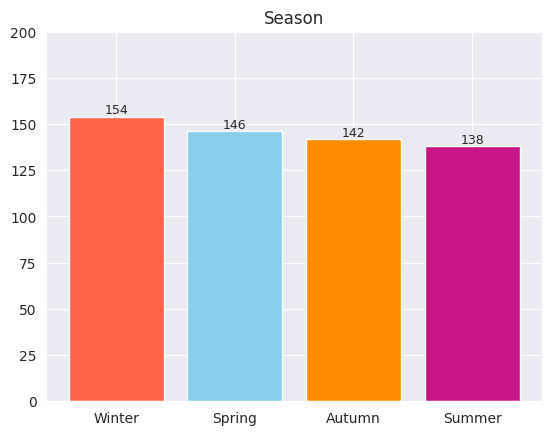

In [39]:
# Season variable:
print(df['Season'].describe())
print(df['Season'].value_counts())

sizes_season = df['Season'].value_counts().tolist()
labels_season = df['Season'].value_counts().index
fig, ax = plt.subplots()
bar_container = ax.bar(labels_season, sizes_season, color=['tomato', 'skyblue', 'darkorange', 'mediumvioletred', 'darkseagreen', 'gold'])
ax.bar_label(bar_container, fmt='{:,.0f}', fontsize=9)
ax.set(title='Season', ylim=(0, 200))
plt.show()

count    580.000000
mean      12.105172
std        4.433462
min        1.000000
25%       10.000000
50%       14.000000
75%       15.000000
max       24.000000
Name: Services, dtype: float64


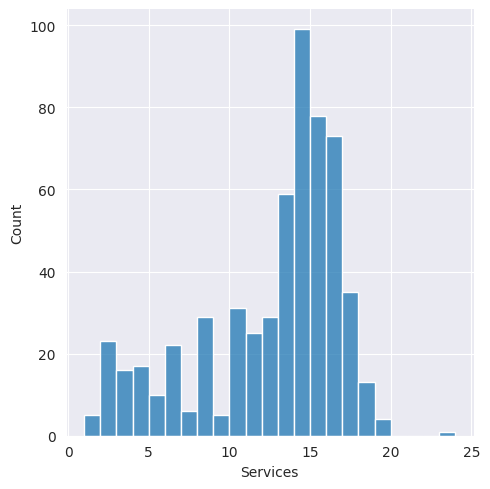

In [40]:
# Services variable:
print(df['Services'].describe())

sns.displot(data=df, x='Services', binwidth=1)

count    580.000000
mean     415.230690
std      159.283198
min        5.000000
25%      338.400000
50%      426.950000
75%      549.900000
max      802.000000
Name: Total_KM, dtype: float64


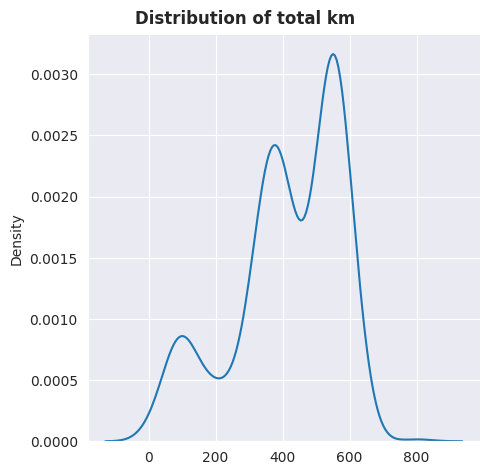

In [41]:
# Total_KM variable:
print(df['Total_KM'].describe())
sns.displot(data=df, x="Total_KM", kind="kde")
plt.xlabel('')
plt.subplots_adjust(top=0.93)
plt.suptitle('Distribution of total km', fontweight='bold', y=0.98, ha='center')
plt.savefig('km.png', transparent=True)

count    580.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: R4_progr_count, dtype: float64


count    580.000000
mean       0.548276
std        0.498094
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: RD_progr_count, dtype: float64


count    580.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: RP_progr_count, dtype: float64


count    580.000000
mean       3.701724
std        2.094238
min        0.000000
25%        2.000000
50%        4.000000
75%        5.000000
max        7.000000
Name: RT_progr_count, dtype: float64


count    580.000000
mean       5.194828
std        2.084147
min        2.000000
25%        3.000000
50%        5.000000
75%        7.000000
max        9.000000
Name: VI_progr_count, dtype: float64


count    580.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%       

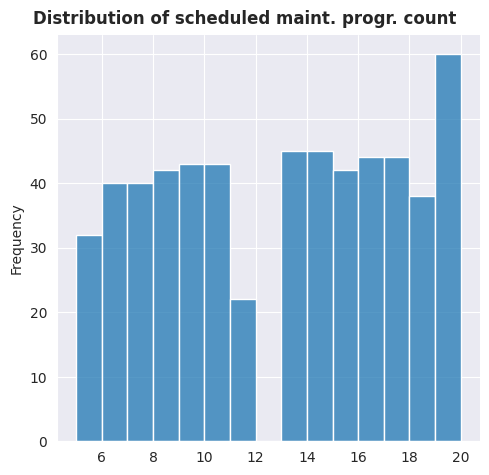

In [42]:
# Scheduled maintenance progressive count variable:
print(df['R4_progr_count'].describe())
print("\n")
print(df['RD_progr_count'].describe())
print("\n")
print(df['RP_progr_count'].describe())
print("\n")
print(df['RT_progr_count'].describe())
print("\n")
print(df['VI_progr_count'].describe())
print("\n")
print(df['VIS_progr_count'].describe())
print("\n")
print(df['Sched_maint_progr'].describe())

sns.displot(data=df, x="Sched_maint_progr", binwidth=1)
plt.xlabel('')
plt.ylabel('Frequency')
plt.subplots_adjust(top=0.93)
plt.suptitle('Distribution of scheduled maint. progr. count', fontweight='bold', y=0.98, ha='center')
plt.savefig('sched_maint.png', transparent=True)

count    580.000000
mean      13.270690
std        3.419062
min        6.000000
25%       10.000000
50%       15.000000
75%       16.000000
max       20.000000
Name: Corr_maint_progr, dtype: float64


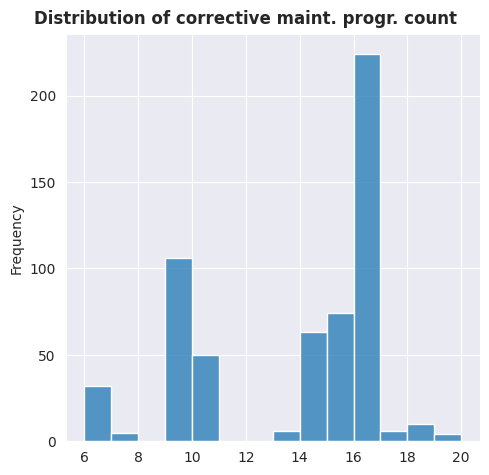

In [43]:
# Corrective maintenance progressive count variable:
print(df['Corr_maint_progr'].describe())

sns.displot(data=df, x="Corr_maint_progr", binwidth=1)
plt.xlabel('')
plt.ylabel('Frequency')
plt.subplots_adjust(top=0.93)
plt.suptitle('Distribution of corrective maint. progr. count', fontweight='bold', y=0.98, ha='center')
plt.savefig('corr_maint.png', transparent=True)

count                              580
mean     2021-12-03 15:38:28.965517312
min                2020-11-12 00:00:00
25%                2021-05-16 18:00:00
50%                2021-12-20 12:00:00
75%                2022-06-13 06:00:00
max                2022-12-22 00:00:00
Name: Time, dtype: object


starting: 2020-11-12 00:00:00
ending: 2022-12-22 00:00:00


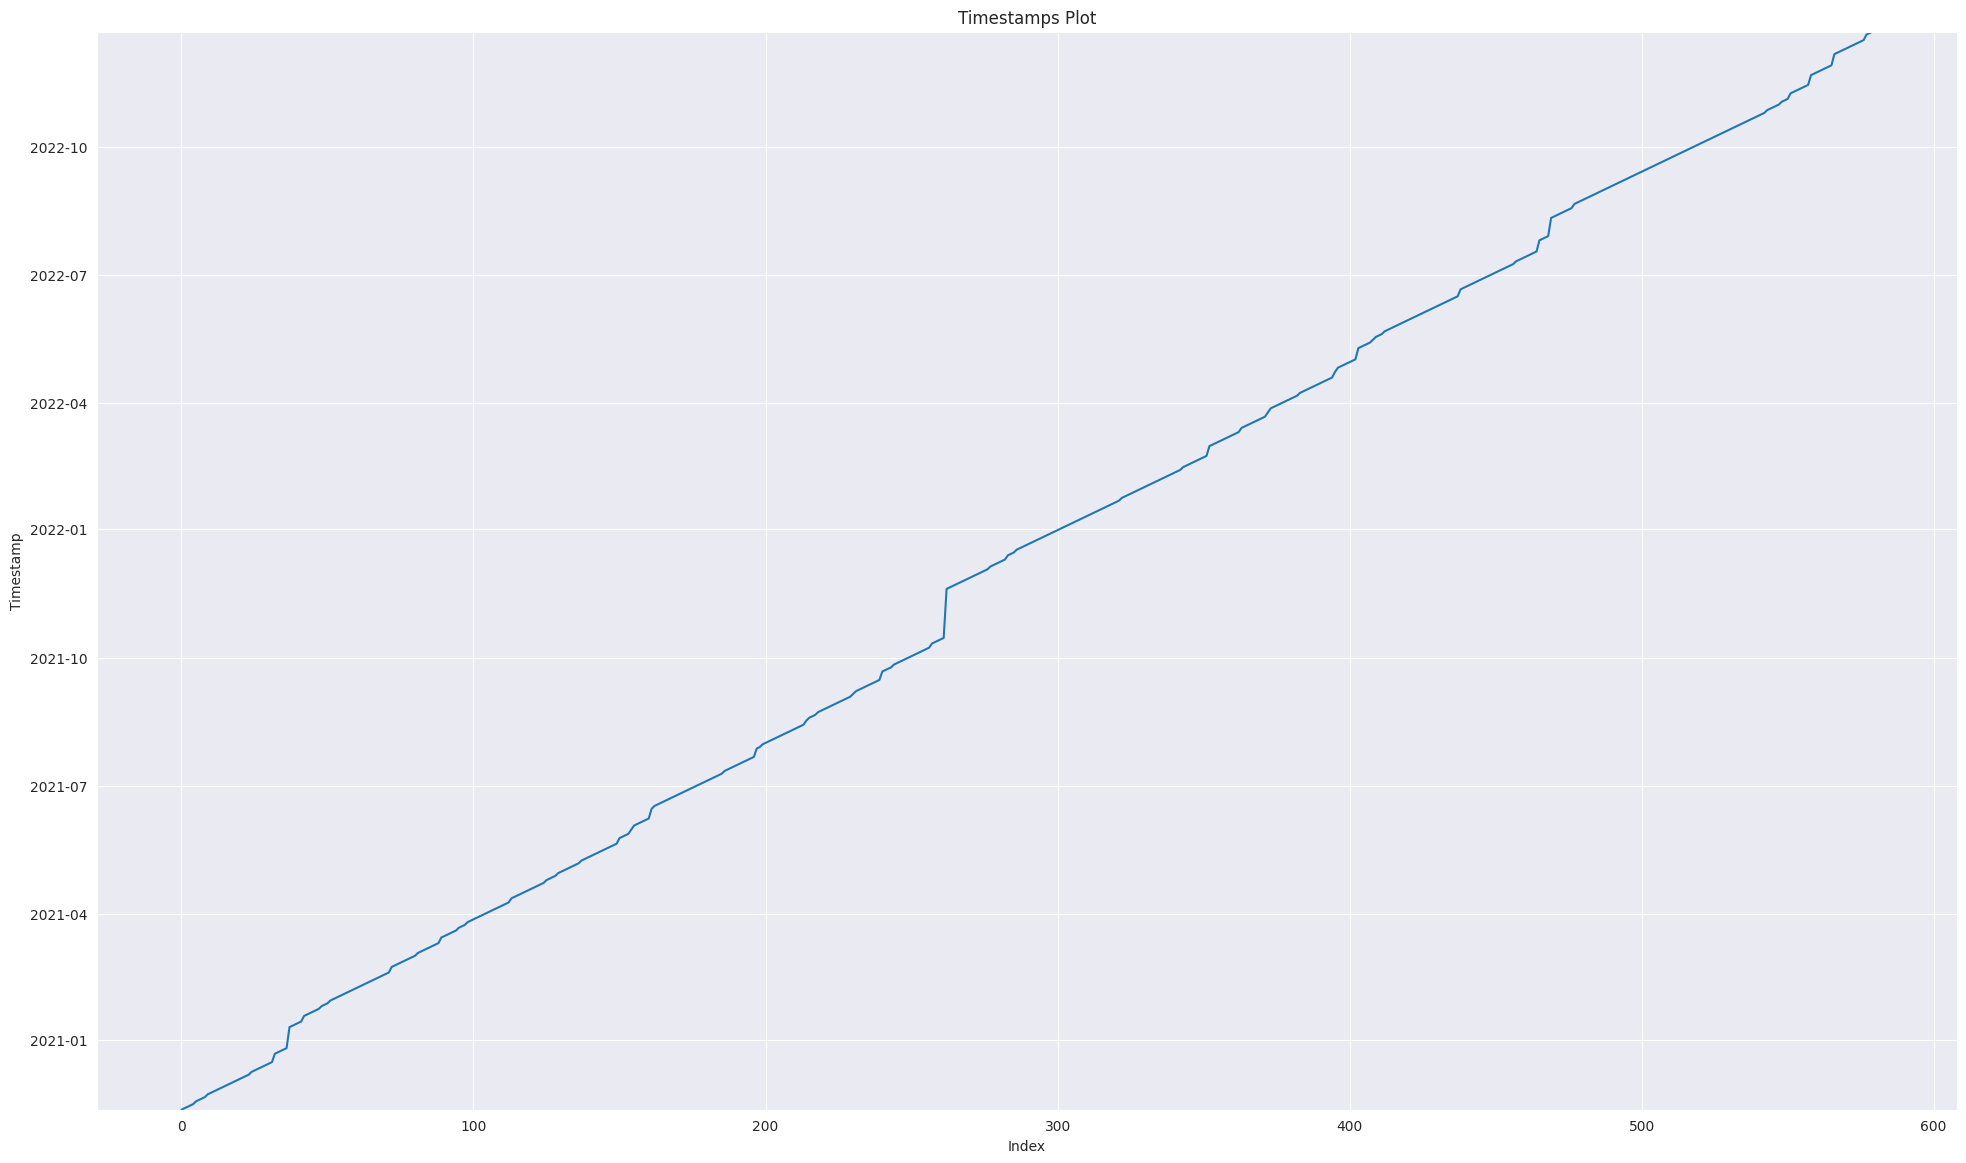

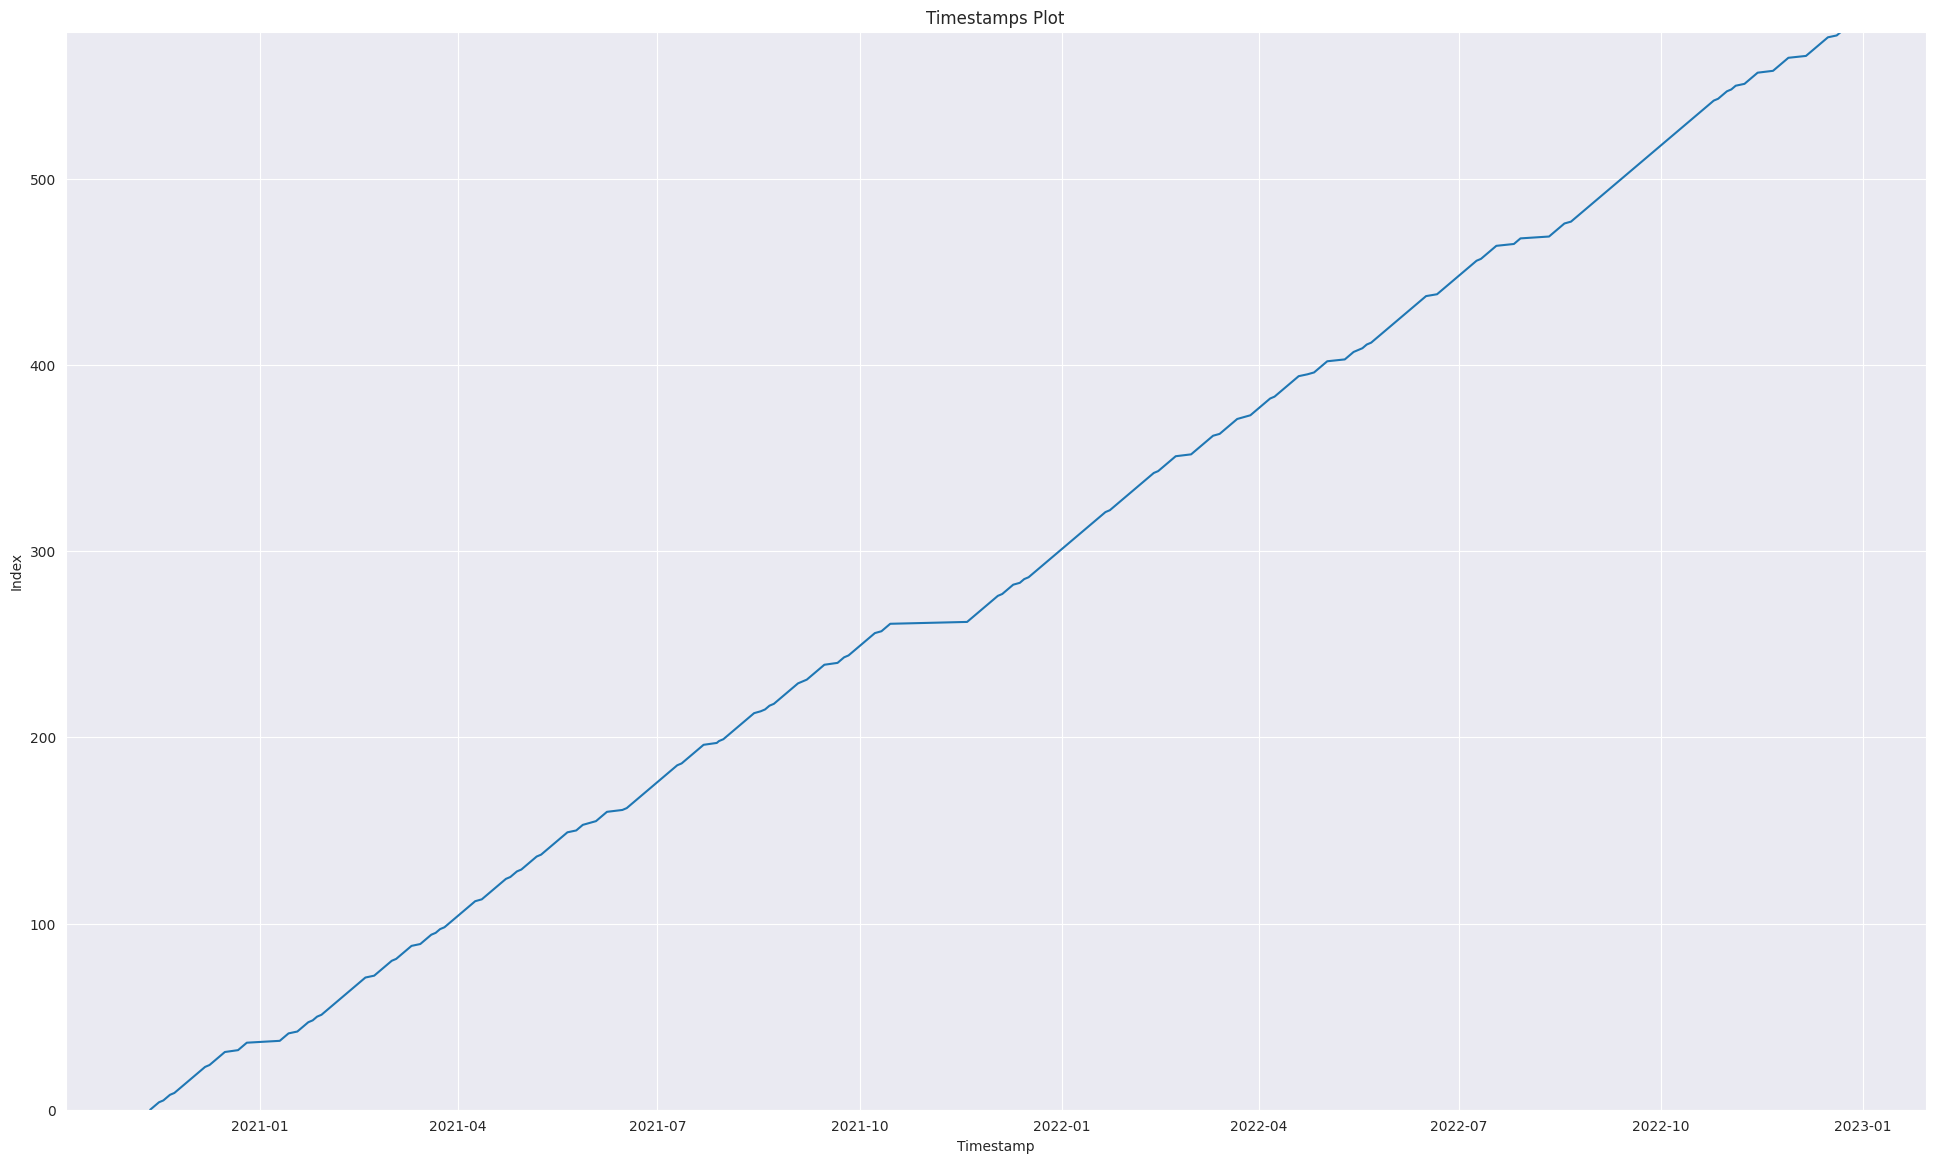

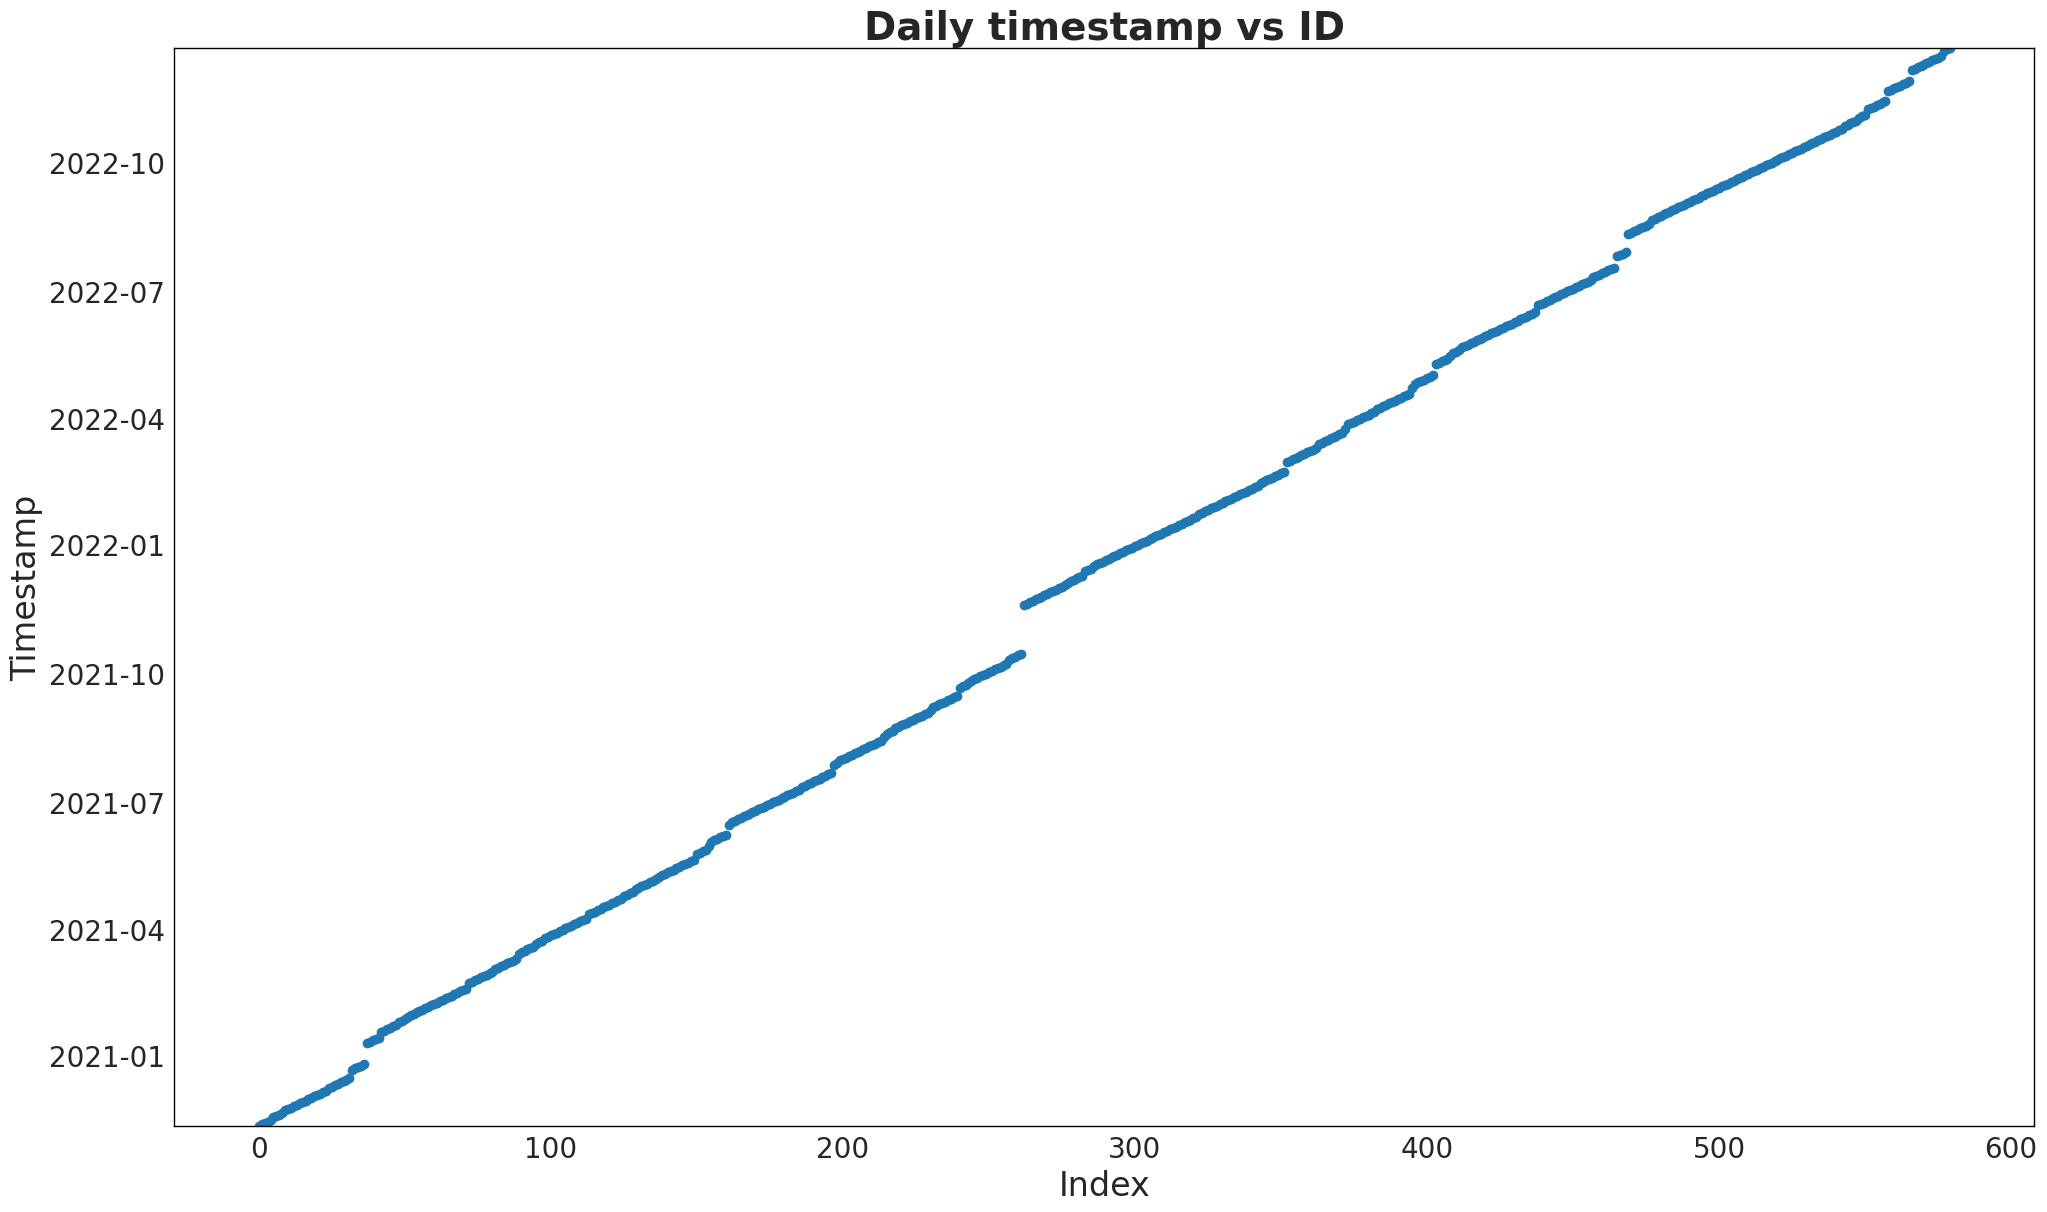

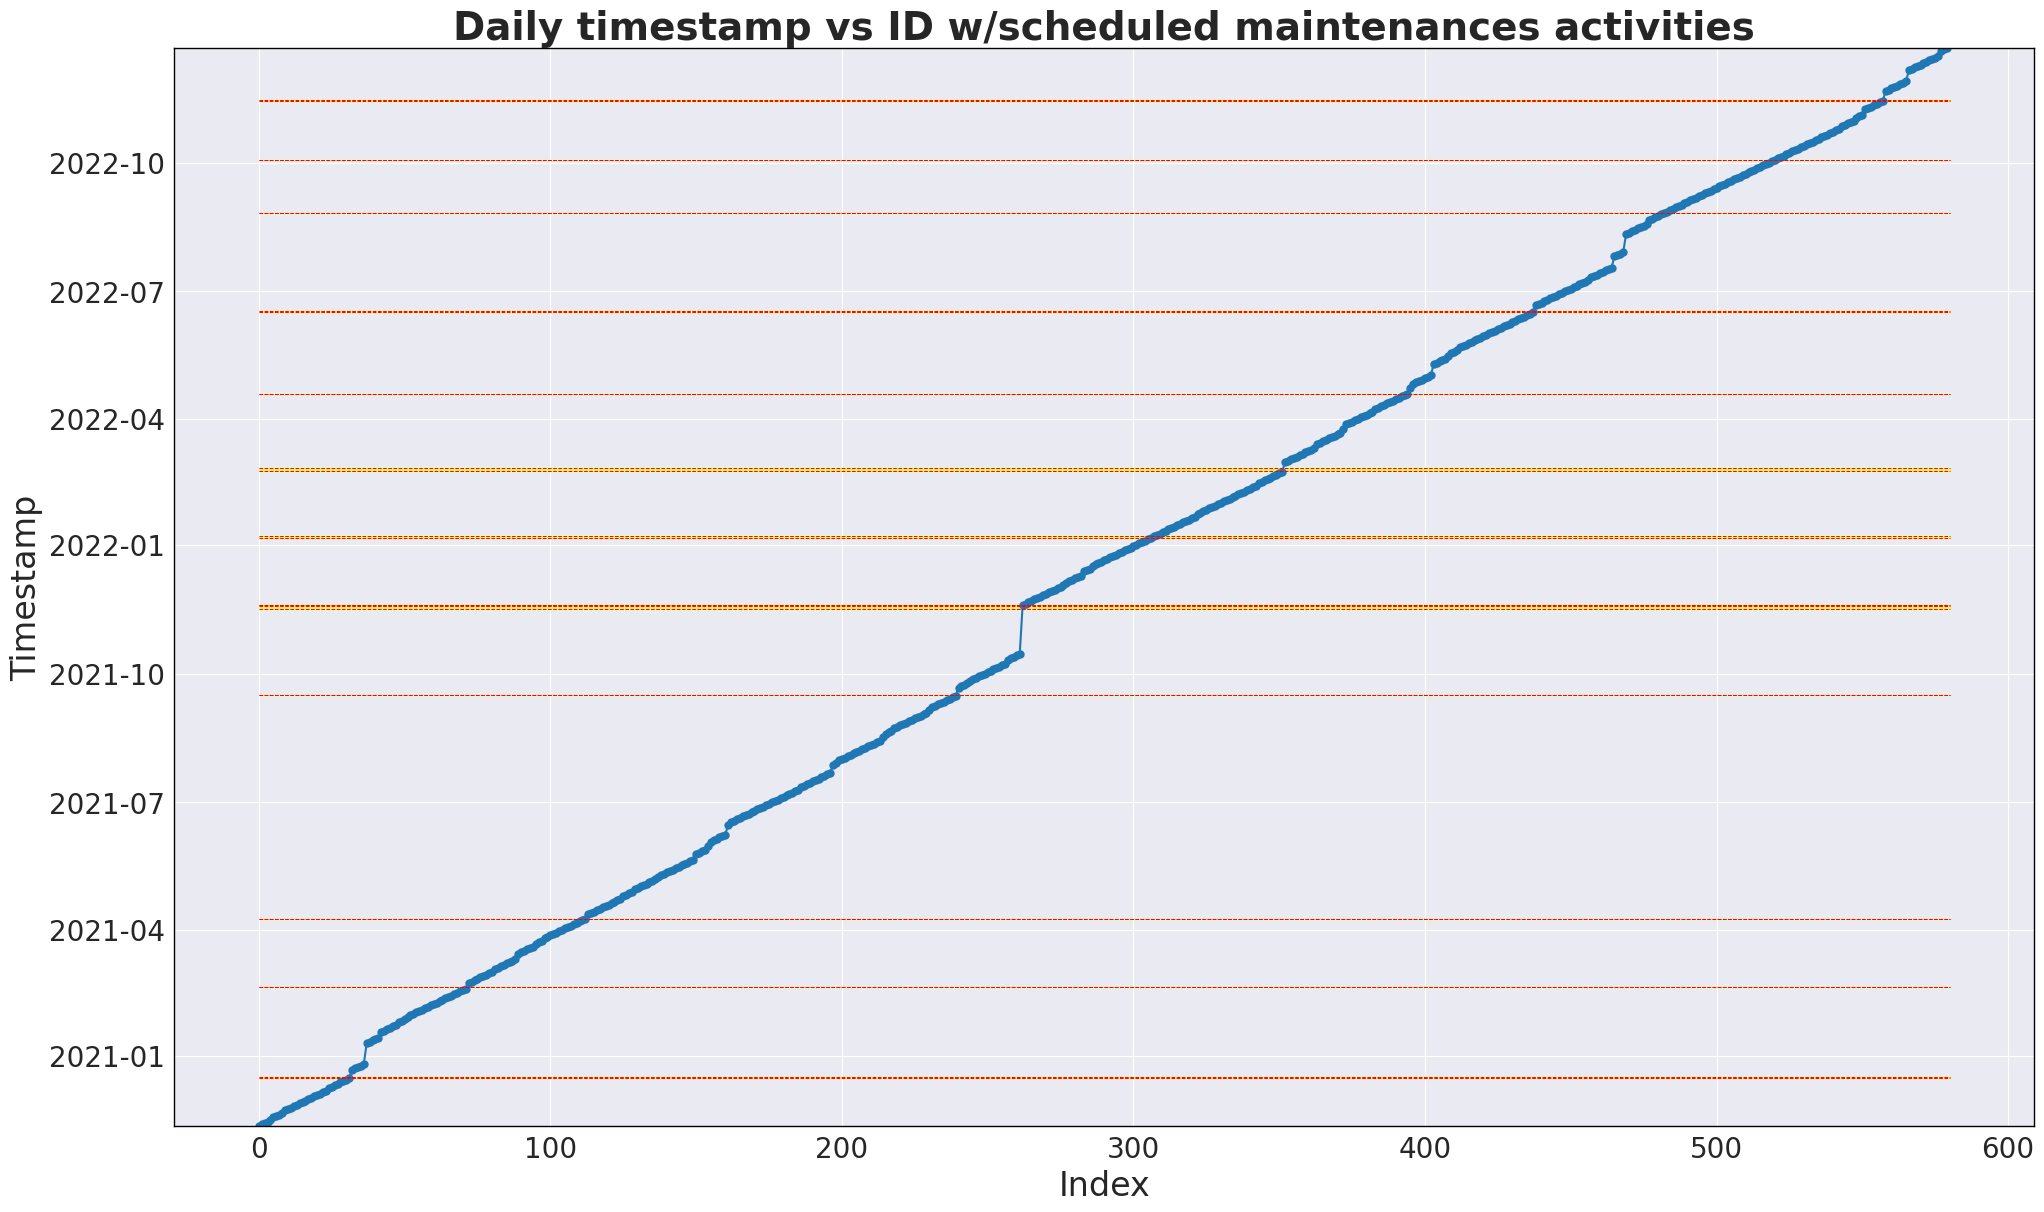

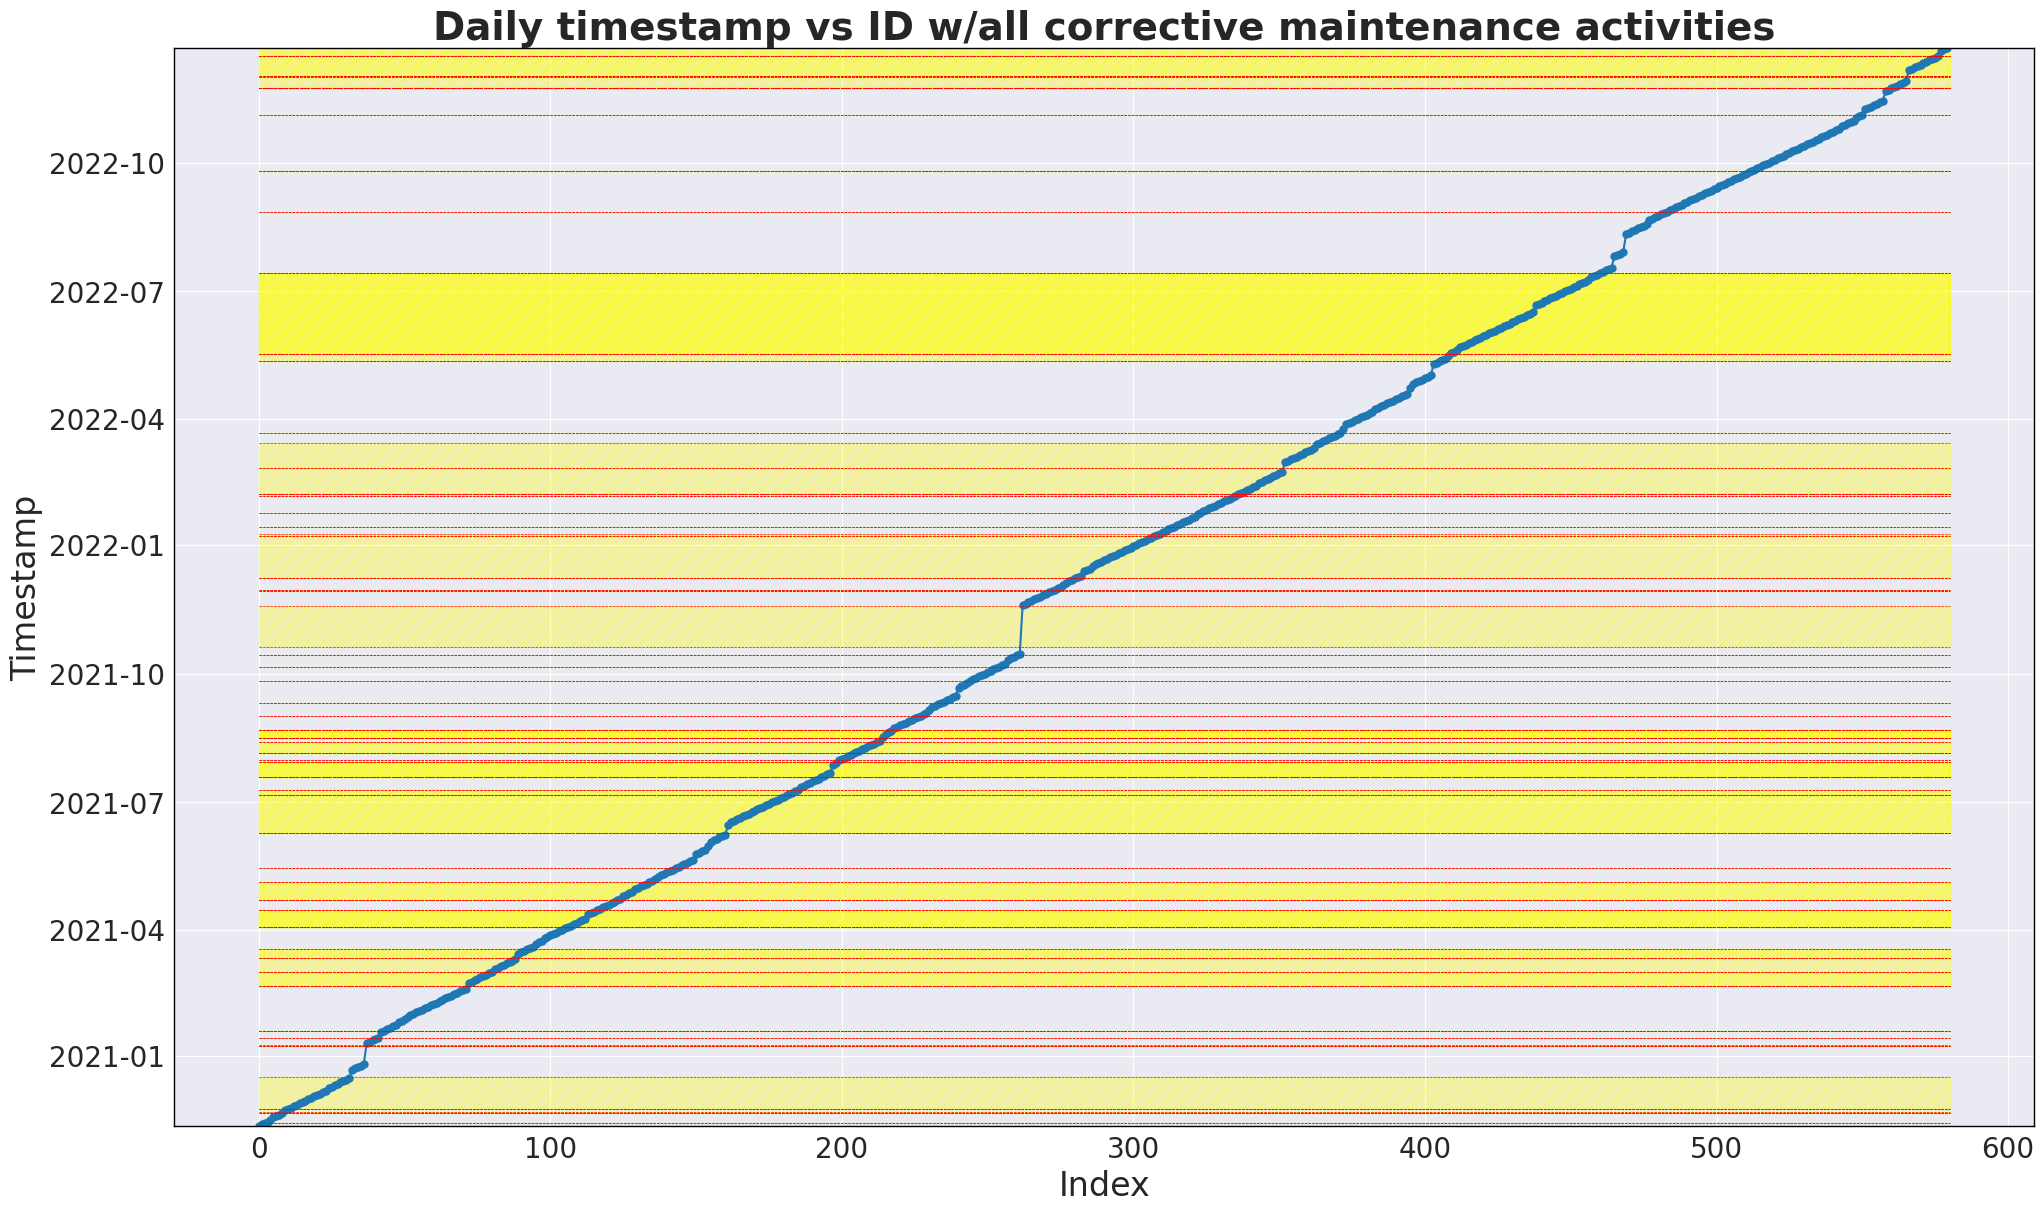

In [48]:
# Time variable:
print(df['Time'].describe())
print("\n")
print(f"starting: {df['Time'].min()}")                        # 2020-11-12 00:00:00
print(f"ending: {df['Time'].max()}")                          # 2023-09-27 00:00:00

# plot:
#   a) line:
plt.figure(figsize=(24, 14))
plt.plot(df.index, df['Time'])
plt.ylim(df['Time'].min(), df['Time'].max())
plt.xlabel('Index')
plt.ylabel('Timestamp')
plt.title('Timestamps Plot')
# x e y invertiti:
plt.figure(figsize=(24, 14))
plt.plot(df['Time'], df.index)
plt.ylim(df.index.min(), df.index.max())
plt.xlabel('Timestamp')
plt.ylabel('Index')
plt.title('Timestamps Plot')


#   b) points to highlight gaps:
plt.figure(figsize=(24, 14))
plt.ylim(df['Time'].min(), df['Time'].max())
plt.scatter(df.index, df['Time'], marker='o')
plt.xlabel('Index', fontsize=24)
plt.ylabel('Timestamp', fontsize=24)
plt.title('Daily timestamp vs ID', fontsize=28, fontweight='bold')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(True)
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1)
plt.gcf().set_facecolor('white')  # Set figure background color
plt.gca().set_facecolor('white')  # Set axes background color
plt.savefig('timestamp_id_final.png', transparent=False)


#   c) highlights scheduled maintenances (all types):
plt.figure(figsize=(24, 14))
plt.plot(df.index, df['Time'], marker='o', linestyle='-', markersize=5)
plt.ylim(df['Time'].min(), df['Time'].max())
plt.xlabel('Index', fontsize=24)
plt.ylabel('Timestamp', fontsize=24)
plt.title('Daily timestamp vs ID w/scheduled maintenances activities', fontsize=28, fontweight='bold')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

for start, end in zip(sched_maint["Start_date"], sched_maint["End_date"]):
    if not pd.isna(start):
        plt.hlines(y=[start, end], xmin=0, xmax=len(df), color='r', ls='--', linewidth=0.7)
        plt.fill_betweenx([start, end], 0, len(df), color='yellow', alpha=0.5)

ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(True)
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1)

plt.savefig('daily_sched_maint.png', transparent=True)


#   d) highlights corrective maintenances (all types):
plt.figure(figsize=(24, 14))
plt.plot(df.index, df['Time'], marker='o', linestyle='-', markersize=5)
plt.ylim(df['Time'].min(), df['Time'].max())
plt.xlabel('Index', fontsize=24)
plt.ylabel('Timestamp', fontsize=24)
plt.title('Daily timestamp vs ID w/all corrective maintenance activities', fontsize=28, fontweight='bold')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

for start, end in zip(corr_maint["Start_date"], corr_maint["End_date"]):
    if not pd.isna(start):
        plt.hlines(y=[start, end], xmin=0, xmax=len(df), color='r', ls='--', linewidth=0.5)
        plt.fill_betweenx([start, end], 0, len(df), color='yellow', alpha=0.3, hatch='//')

ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(True)
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1)

plt.savefig('daily_corr_maint.png', transparent=True)